# Рекомендательные системы

---

### Описание

Рекомендательные системы используют данные о предпочтениях и интересах пользователей для персонализированных рекомендаций. Они применяются на стриминговых платформах, в онлайн-магазинах, музыкальных сервисах и соцсетях.

---

### Анализ

Системы анализируют поведение пользователей, такое как просмотры и оценки, чтобы предсказать интересные для них элементы.

---

### Архитектура

Обычно используется двухуровневая архитектура:

1. **Генерация кандидатов**:
    - На первом уровне система обрабатывает данные пользователей для создания рекомендаций.

2. **Персонализация**:
    - На втором уровне система уточняет рекомендации с помощью алгоритмов машинного обучения, создавая персонализированный профиль пользователя для более точных рекомендаций.


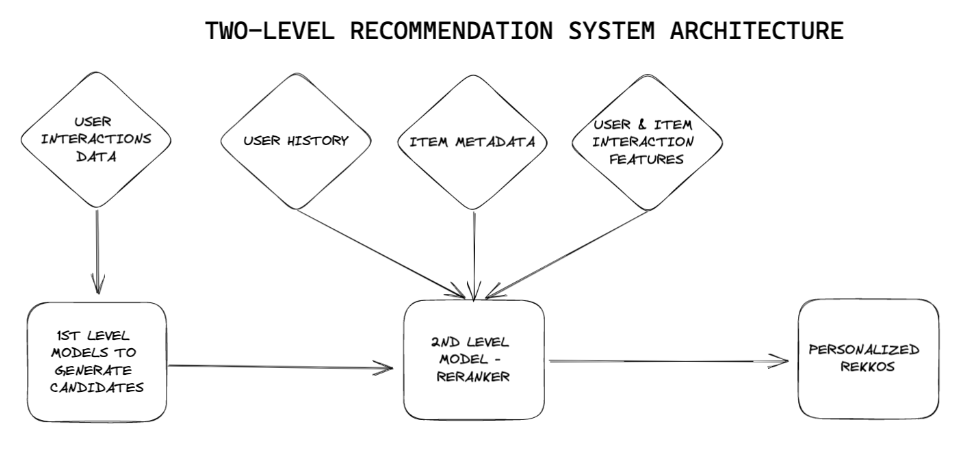

# Первый уровень модели рекомендаций

---

### Основные типы

Первый уровень модели можно разделить на два основных типа: контентно-ориентированные и коллаборативная фильтрация. Также часто используется гибридная схема, объединяющая оба типа.

---

### Фильтрация на основе контента

Контентно-ориентированные системы используют информацию о характеристиках объекта и сравнивают их с характеристиками объектов, с которыми пользователь уже взаимодействовал. Например, в OKKO сервис может использовать информацию о жанре фильма, актёрах и других мета-данных, чтобы определить, насколько он похож на фильмы, которые пользователь уже смотрел.

---

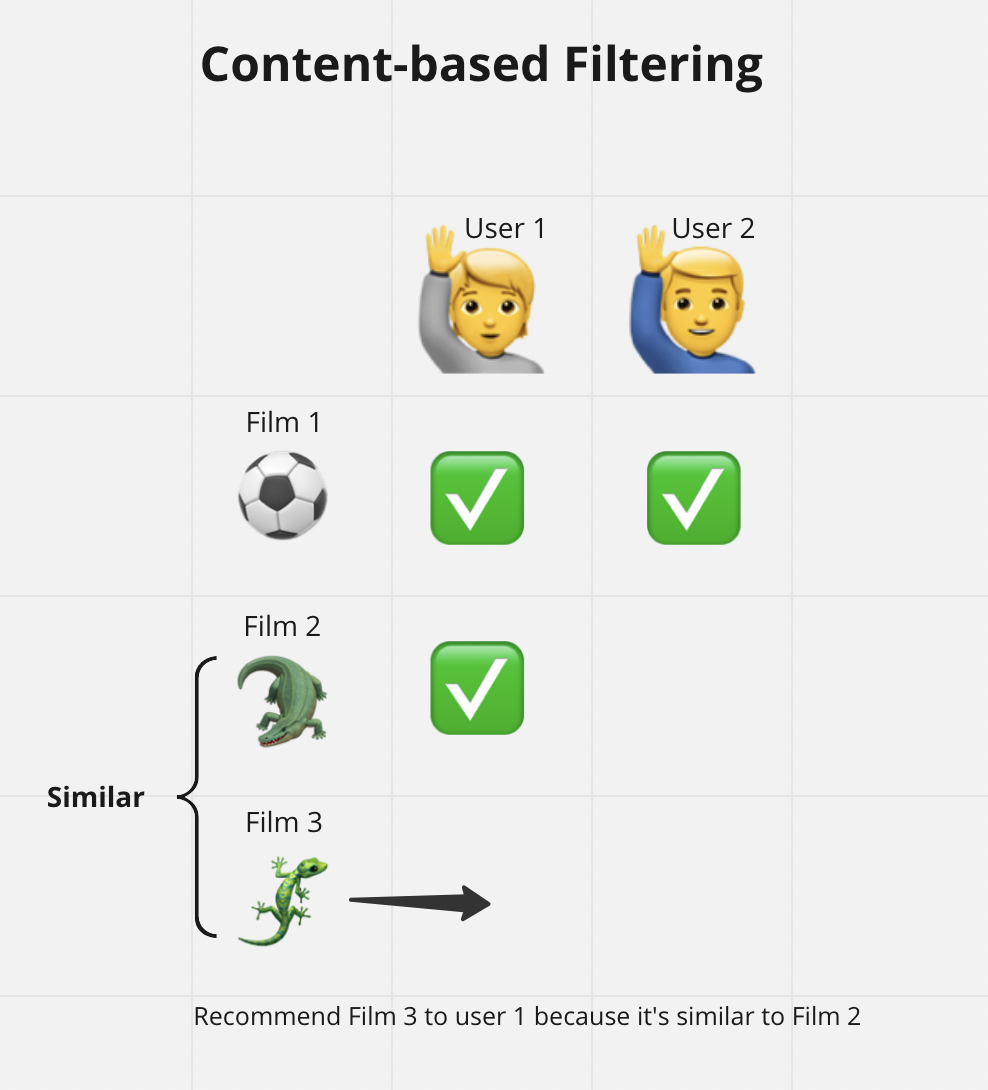

### Коллаборативная фильтрация

Системы коллаборативной фильтрации используют данные от других пользователей для создания прогнозов. Этот тип системы ищет закономерности в данных группы пользователей и использует их для рекомендаций отдельным пользователям. Например, если группа пользователей посмотрела один и тот же фильм, система коллаборативной фильтрации может порекомендовать этот фильм другим пользователям с похожими предпочтениями.


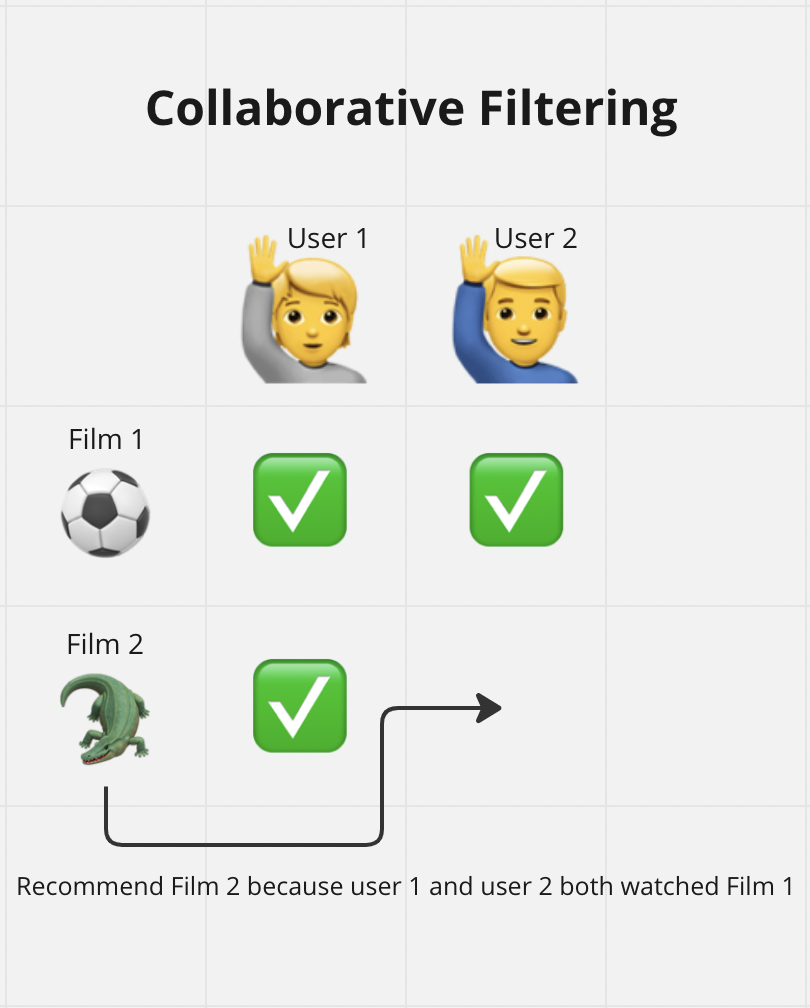

# Применение рекомендательных систем

---

### Успешное использование в различных отраслях

Рекомендательные системы успешно используются в таких компаниях, как Amazon, Netflix, Spotify и Tinder для персонализированных рекомендаций.

---

### Популярность и преимущества

Популярность рекомендательных систем выросла благодаря онлайн-кинотеатрам и доступности больших данных. Компании используют эти системы для повышения удовлетворенности и лояльности клиентов, а также для снижения затрат.

---

### Двухуровневая архитектура

Для рекомендаций необходимы взаимодействия пользователя с элементами и метаданные. В индустрии часто используется двухуровневая архитектура:

1. **Первый уровень**:
    - Генерация кандидатов на основе эмбеддингов и методов, таких как контентно-ориентированные и коллаборативная фильтрация.

2. **Второй уровень**:
    - Ранжирование для максимизации вероятности взаимодействия.

---

### Особые случаи

Особое внимание уделяется решению проблем:

- **Холодный старт**: отсутствие истории пользователя.
- **Повторные рекомендации**: избегание рекомендаций уже взаимодействованных элементов, за исключением товаров, таких как продукты питания.

# Бейзлайн

In [88]:
RATINGS_SMALL_URL = 'http://drive.google.com/file/d/1BlZfCLLs5A13tbNSJZ1GPkHLWQOnPlE4/view?usp=share_link'
MOVIES_METADATA_URL = 'http://drive.google.com/file/d/19g6-apYbZb5D-wRj4L7aYKhxS-fDM4Fb/view?usp=share_link'

Здесь мы будем использовать два набора данных:

**interactions** — представляет собой данные из `RATINGS_SMALL_URL`, где у нас есть `userId`, `movieId`, `timestamp` и `rating` (наша целевая переменная).

**movies_metadata** — содержит данные из `MOVIES_METADATA_URL`, где представлена информация о фильмах: описание, жанры и т.д.

In [89]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from itertools import islice, cycle, product

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

def read_csv_from_gdrive(url):
    """
    получает данные в формате csv по заданному url (берется из меню file -> share -> copy link)
    :url: example https://drive.google.com/file/d/1BlZfCLLs5A13tbNSJZ1GPkHLWQOnPlE4/view?usp=share_link
    """
    file_id = url.split('/')[-2]
    file_path = 'https://drive.google.com/uc?export=download&id=' + file_id
    data = pd.read_csv(file_path)

    return data

In [90]:
interactions = read_csv_from_gdrive(RATINGS_SMALL_URL)
interactions.head()

,userId,movieId,rating,timestamp
0,1,31,2.50,1260759144
1,1,1029,3.00,1260759179
2,1,1061,3.00,1260759182
3,1,1129,2.00,1260759185
4,1,1172,4.00,1260759205


In [96]:
interactions = read_csv_from_gdrive(RATINGS_SMALL_URL)
interactions.head()

,userId,movieId,rating,timestamp
0,1,31,2.50,1260759144
1,1,1029,3.00,1260759179
2,1,1061,3.00,1260759182
3,1,1129,2.00,1260759185
4,1,1172,4.00,1260759205


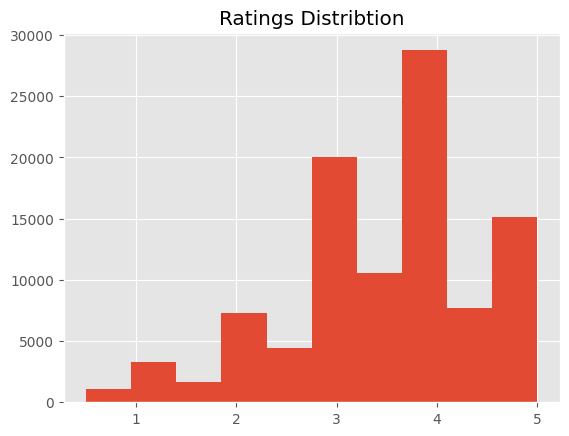

In [97]:
plt.style.use('ggplot')
interactions['rating'].hist();
plt.title('Ratings Distribtion');

In [98]:
movies_metadata = read_csv_from_gdrive(MOVIES_METADATA_URL)
movies_metadata.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.00,81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,5415.00
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.00,104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90,2413.00
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.00,101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50,92.00
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.00,127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10,34.00
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.00,106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70,173.00


In [99]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

# Подготовка данных

Здесь мы будем:

- Предобрабатывать имена столбцов;
- Устанавливать одинаковые типы данных;
- Оставлять фильмы в `interactions`, которые присутствуют в `movies_metadata`;
- Создавать набор данных пользователей для рекомендаций;
- Создавать отображение названий фильмов и их идентификаторов для удобства.

Сначала нам нужно объединить два датафрейма, и для этого необходимо привести имена столбцов и типы данных в соответствие для удобства. Связь между обоими наборами данных осуществляется через идентификатор фильма (`movieId`).

In [100]:
# выровнять данные в обоих фреймах для объединения

interactions['movieId'] = interactions['movieId'].astype(str)
movies_metadata.rename(columns = {'id': 'movieId'}, inplace = True)

In [101]:
# оставить только те фильмы, которые есть в movies_metadata

interactions_filtered = interactions.loc[interactions['movieId'].isin(movies_metadata['movieId'])]
print(interactions.shape, interactions_filtered.shape)

(100004, 4) (44989, 4)


In [102]:
# создать входные данные пользователей

users = interactions[['userId']].drop_duplicates().reset_index(drop = True)
users

,userId
0,1
1,2
2,3
3,4
4,5
...,...
666,667
667,668
668,669
669,670


In [103]:
# создать связующее звено для имен movieId и title

item_name_mapper = dict(zip(movies_metadata['movieId'], movies_metadata['original_title']))

In [104]:
item_name_mapper

{'862': 'Toy Story',
 '8844': 'Jumanji',
 '15602': 'Grumpier Old Men',
 '31357': 'Waiting to Exhale',
 '11862': 'Father of the Bride Part II',
 '949': 'Heat',
 '11860': 'Sabrina',
 '45325': 'Tom and Huck',
 '9091': 'Sudden Death',
 '710': 'GoldenEye',
 '9087': 'The American President',
 '12110': 'Dracula: Dead and Loving It',
 '21032': 'Balto',
 '10858': 'Nixon',
 '1408': 'Cutthroat Island',
 '524': 'Casino',
 '4584': 'Sense and Sensibility',
 '5': 'Four Rooms',
 '9273': 'Ace Ventura: When Nature Calls',
 '11517': 'Money Train',
 '8012': 'Get Shorty',
 '1710': 'Copycat',
 '9691': 'Assassins',
 '12665': 'Powder',
 '451': 'Leaving Las Vegas',
 '16420': 'Othello',
 '9263': 'Now and Then',
 '17015': 'Persuasion',
 '902': 'La Cité des Enfants Perdus',
 '37557': '摇啊摇，摇到外婆桥',
 '9909': 'Dangerous Minds',
 '63': 'Twelve Monkeys',
 '78802': 'Guillaumet, les ailes du courage',
 '9598': 'Babe',
 '47018': 'Carrington',
 '687': 'Dead Man Walking',
 '139405': 'Across the Sea of Time',
 '33689': 'It T

# Модель

Давайте определим наш базовый рекомендатель популярности `BaselineRecommender` — он будет предлагать наиболее рейтинговые названия, основанные на средней оценке, с возможностью получения рекомендаций по любой группе(ам).

Пайплайн будет похож на большинство модулей машинного обучения в Python — в конце он будет иметь два метода: `fit()` и `recommend()`.

Логика метода `fit()` следующая:

- Инициализация рекомендаций на основе медианного рейтинга всех наблюдений `recomm_common`.
- Подготовка списка просмотренных пользователями объектов.
- Если установлены группы, получаем рекомендации, то есть вычисляем рейтинги фильмов по группам:
  - Если получаем `NaN`, заполняем базовыми рекомендациями.
  - Если получаем меньше требуемого количества кандидатов, дополняем из базовых рекомендаций.

Логика метода `recommend()`:

- Возвращаем базовые рекомендации, если данные пользователей не заданы.
- В случае требований по категориям — получаем результаты, рассчитанные в методе `fit()`.


## Fit

In [105]:
MAX_CANDIDATES = 20
ITEM_COLUMN = 'movieId'
USER_COLUMN = 'userId'

In [106]:
def compute_popularity(df: pd.DataFrame, item_id: str, max_candidates: int):
    """
    Рассчитывает средний рейтинг для определения популярных названий
    """
    popular_titles = df.groupby(item_id).agg({'rating': np.mean})\
                     .sort_values(['rating'], ascending=False).head(max_candidates).index.values

    return popular_titles

In [13]:
base_recommendations = compute_popularity(interactions_filtered, ITEM_COLUMN, MAX_CANDIDATES)
base_recommendations

array(['74727', '128846', '702', '127728', '65216', '43267', '8675',
       '80717', '86817', '8699', '872', '27724', '26791', '876', '64278',
       '301', '59392', '3021', '3112', '1933'], dtype=object)

Таким образом, мы получили 20 фильмов с самым высоким средним рейтингом Теперь, как мы обсуждали ранее, в рекомендациях фильмов нет необходимости рекомендовать тот же фильм, который пользователь уже смотрел. 

Давайте реализуем это следующим образом Мы получаем все взаимодействовавшие элементы для каждого пользователя и сохраняем их в словаре {'userId': [список элементов]}


In [83]:
known_items = interactions_filtered.groupby(USER_COLUMN)[ITEM_COLUMN].apply(list).to_dict()
print(f"Количество пользователей с известными объектами: {len(known_items)} \n")

print(f"Пример известных идентификаторов объектов для конкретного пользователя: {known_items[1]}")

Количество пользователей с известными объектами: 671 

Пример известных идентификаторов объектов для конкретного пользователя: ['1371', '1405', '2105', '2193', '2294', '2455']


Теперь у нас есть все необходимые компоненты: базовые рекомендации без групп с возможностью фильтрации уже просмотренных элементов Также, если мы хотим получить рекомендации на основе некоторых групп пользователей, мы можем легко сделать то же самое с помощью метода groupby() и того же подхода

In [113]:
group = [np.random.random_integers(2) for x in range(len(users))]
users['group'] = group
users.head(3)

,userId,group
0,1,1
1,2,2
2,3,1


In [16]:
data = pd.merge(interactions_filtered, users, how='left', on = USER_COLUMN)
data.head(3)

,userId,movieId,rating,timestamp,group
0,1,1371,2.50,1260759135,1
1,1,1405,1.00,1260759203,1
2,1,2105,4.00,1260759139,1


In [17]:
data.groupby('group').apply(compute_popularity, ITEM_COLUMN, MAX_CANDIDATES)

group
1    [5071, 79008, 872, 26578, 31903, 114464, 4518,...
2    [128846, 4442, 8933, 2755, 5473, 54256, 89904,...
dtype: object

In [18]:
group_recommendations = data.groupby('group').apply(compute_popularity, ITEM_COLUMN, MAX_CANDIDATES)
group_recommendations.head()

group
1    [5071, 79008, 872, 26578, 31903, 114464, 4518,...
2    [128846, 4442, 8933, 2755, 5473, 54256, 89904,...
dtype: object

In [19]:
def fit(
    data: pd.DataFrame,
    item_col: str,
    groups: list = None,
    max_candidates: int = 20
    ):
    """
    функция запускает весь конвейер для генерации рекомендаций на основе заданной группы
    :data: таблица данных о взаимодействиях
    :item_col: имя столбца элемента
    :groups: опционально, список имен столбцов групп для получения рекомендаций
    :max_candidates: количество рекомендаций для возврата
    """
    
    if groups is not None:
        recommendations = data.groupby(groups).apply(compute_popularity, item_col, max_candidates)
    else:
        recommendations = compute_popularity(data, item_col, max_candidates)

    return recommendations

In [20]:
fit(data, item_col='movieId')

array(['74727', '128846', '702', '127728', '65216', '43267', '8675',
       '80717', '86817', '8699', '872', '27724', '26791', '876', '64278',
       '301', '59392', '3021', '3112', '1933'], dtype=object)

In [21]:
fit(data, item_col='movieId', groups=['group'])

group
1    [5071, 79008, 872, 26578, 31903, 114464, 4518,...
2    [128846, 4442, 8933, 2755, 5473, 54256, 89904,...
dtype: object

# Recommend

Ранее мы обсуждали, что можно взять только среднее/медиану и т. д. значение рейтинга и использовать его как метрику популярности для рекомендаций. Таким образом, если у нас нет групп для рассмотрения (т.е. более детальной оценки), то это означает, что мы даем одинаковые рекомендации для всех пользователей, т.е. base_recommendations

In [22]:
recs = list(islice(cycle([base_recommendations]), len(users['userId'])))
users['rekkos'] = recs
users.head()

,userId,group,rekkos
0,1,1,"[74727, 128846, 702, 127728, 65216, 43267, 867..."
1,2,2,"[74727, 128846, 702, 127728, 65216, 43267, 867..."
2,3,1,"[74727, 128846, 702, 127728, 65216, 43267, 867..."
3,4,1,"[74727, 128846, 702, 127728, 65216, 43267, 867..."
4,5,1,"[74727, 128846, 702, 127728, 65216, 43267, 867..."


Давайте рассмотрим пример с группами, которые мы создали ранее.

In [23]:
group_recommendations = group_recommendations.reset_index()
group_rekkos = pd.merge(users, group_recommendations, how = 'left', on = 'group')
group_rekkos.rename(columns = {0: 'group_wise_rekkos'}, inplace = True)
group_rekkos.head()

,userId,group,rekkos,group_wise_rekkos
0,1,1,"[74727, 128846, 702, 127728, 65216, 43267, 867...","[5071, 79008, 872, 26578, 31903, 114464, 4518,..."
1,2,2,"[74727, 128846, 702, 127728, 65216, 43267, 867...","[128846, 4442, 8933, 2755, 5473, 54256, 89904,..."
2,3,1,"[74727, 128846, 702, 127728, 65216, 43267, 867...","[5071, 79008, 872, 26578, 31903, 114464, 4518,..."
3,4,1,"[74727, 128846, 702, 127728, 65216, 43267, 867...","[5071, 79008, 872, 26578, 31903, 114464, 4518,..."
4,5,1,"[74727, 128846, 702, 127728, 65216, 43267, 867...","[5071, 79008, 872, 26578, 31903, 114464, 4518,..."


Мы получили наши групповые рекомендации из раздела и просто объединили их по группе пользователей, назначенных на

Далее мы приукрасим наш код и обернем его в функцию

In [24]:
def recommend(
    users: pd.DataFrame,
    recommendations: pd.DataFrame,
    groups: list = None,
    K: int = 10
    ):
    """
    рекомендует товары для заданного списка пользователей
    :users: серия / список пользователей для рекомендации
    :рекомендации: вывод функции fit()
    :groups: опционально, список имен столбцов групп для получения рекомендаций
    :K: количество элементов для рекомендации (не всегда мы хотим мгновенно показывать десятки элементов)
    """
    if groups is not None:
        output = pd.merge(users, recommendations.reset_index(), how = 'left', on = 'group')

    else:
        output = users.copy(deep = True)
        recs = list(islice(cycle([recommendations]), len(users['userId'])))
        output['rekkos'] = recs

    return output

In [25]:
recs = fit(data, item_col=ITEM_COLUMN)
check_recs = recommend(users[['userId', 'group']], recs)
check_recs.head()

,userId,group,rekkos
0,1,1,"[74727, 128846, 702, 127728, 65216, 43267, 867..."
1,2,2,"[74727, 128846, 702, 127728, 65216, 43267, 867..."
2,3,1,"[74727, 128846, 702, 127728, 65216, 43267, 867..."
3,4,1,"[74727, 128846, 702, 127728, 65216, 43267, 867..."
4,5,1,"[74727, 128846, 702, 127728, 65216, 43267, 867..."


In [26]:
recs = fit(data, item_col=ITEM_COLUMN, groups = ['group'])
check_recs = recommend(users[['userId', 'group']], recs, ['group'])
check_recs.head()

,userId,group,0
0,1,1,"[5071, 79008, 872, 26578, 31903, 114464, 4518,..."
1,2,2,"[128846, 4442, 8933, 2755, 5473, 54256, 89904,..."
2,3,1,"[5071, 79008, 872, 26578, 31903, 114464, 4518,..."
3,4,1,"[5071, 79008, 872, 26578, 31903, 114464, 4518,..."
4,5,1,"[5071, 79008, 872, 26578, 31903, 114464, 4518,..."


Поздравляю! Ваша первая базовая рекомендательная система готова!!! В следующем разделе мы рассмотрим, как оценивать модели

# Валидация и метрики

## Валидация в Рекомендательных Системах

Валидация играет ключевую роль в обеспечении объективности модели, особенно в контексте рекомендательных систем, которые часто используются для предложений продуктов и услуг пользователям. Если данные, на которых обучается модель, содержат предвзятость, это может привести к неточным прогнозам, и, как следствие, к несправедливым рекомендациям. Валидация позволяет выявить и устранить возможную предвзятость данных путем корректировки параметров модели или выбора другого набора данных.

### Метод Валидации для Рекомендательных Систем

Наиболее подходящим методом валидации для рекомендательных систем является разбиение данных по времени. Этот подход предполагает определение временного интервала для тестового набора, при этом для обучения используются все данные, имеющиеся до начала этого интервала. Этот метод особенно эффективен для моделей первого уровня. Однако на практике, с учетом реранкера, процесс разбиения данных становится более сложным. Рассмотрим основные шаги:

1. **Создание глобальных наборов `train` и `test` с разбиением по времени.**
2. **Разбиение глобального набора `train` по времени на `local_train` и `local_test`.**
3. **Обучение модели первого уровня на `local_train` для генерации кандидатов и прогнозирования на `local_test`.**
4. **Разбиение `local_test` по пользователям на `ranker_train` и `ranker_test`. Обучение ранжировщика на `ranker_train` и проверка на `ranker_test`.**
5. **Прогнозирование на глобальном тестовом наборе с использованием модели первого уровня и ранжировщика.**

Эта схема валидации обеспечивает комплексный подход к проверке точности и объективности рекомендательной системы.

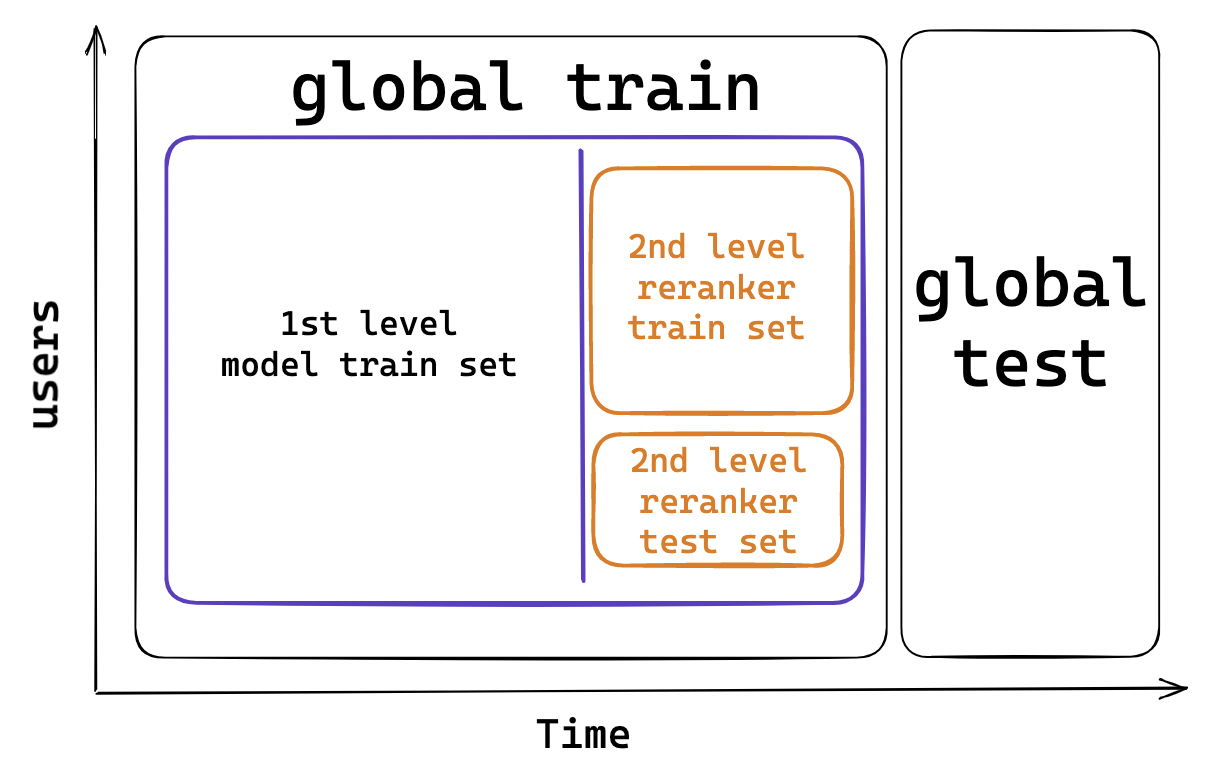

In [27]:
import pandas as pd
import datetime as dt

TRAIN_MAX_DATE = dt.datetime(2022, 2, 14)
TEST_INTERVAL_DAYS = 14 
TEST_MAX_DATE = TRAIN_MAX_DATE + dt.timedelta(days = TEST_INTERVAL_DAYS)

df = pd.DataFrame({'date_time': [], 'values': []})

global_train = df.loc[df['date_time'] <= TRAIN_MAX_DATE].reset_index(drop = True)
global_test = df.loc[(df['date_time'] > TRAIN_MAX_DATE) \
                  & (df['date_time'] <= (TEST_MAX_DATE))].reset_index(drop = True)

## Метрики Оценки Моделей рекоммендательных систем

Теперь давайте определим самые популярные метрики для рекомендаций, основанные на метриках классификации — `Precision@K` и `Recall@K`.

### Что такое `@K`?

В контексте рекомендаций `@K` указывает на количество топ-элементов, которые мы рассматриваем. В рекомендательных системах мы возвращаем список элементов в определенном порядке. Поскольку пользователи обычно просматривают только ограниченное количество рекомендованных элементов, важно установить порог для длины списка, чтобы корректно оценивать метрики.

### Пример

Если мы рекомендовали 100 фильмов, но пользователи обычно просматривают не более 20 из них, то для оценки метрик мы будем использовать только топ-20 рекомендаций. Это позволит нам рассчитать `Precision@20` и `Recall@20`:

- **`Precision@20`** — точность рекомендаций на первых 20 позициях.
- **`Recall@20`** — полнота рекомендаций на первых 20 позициях.


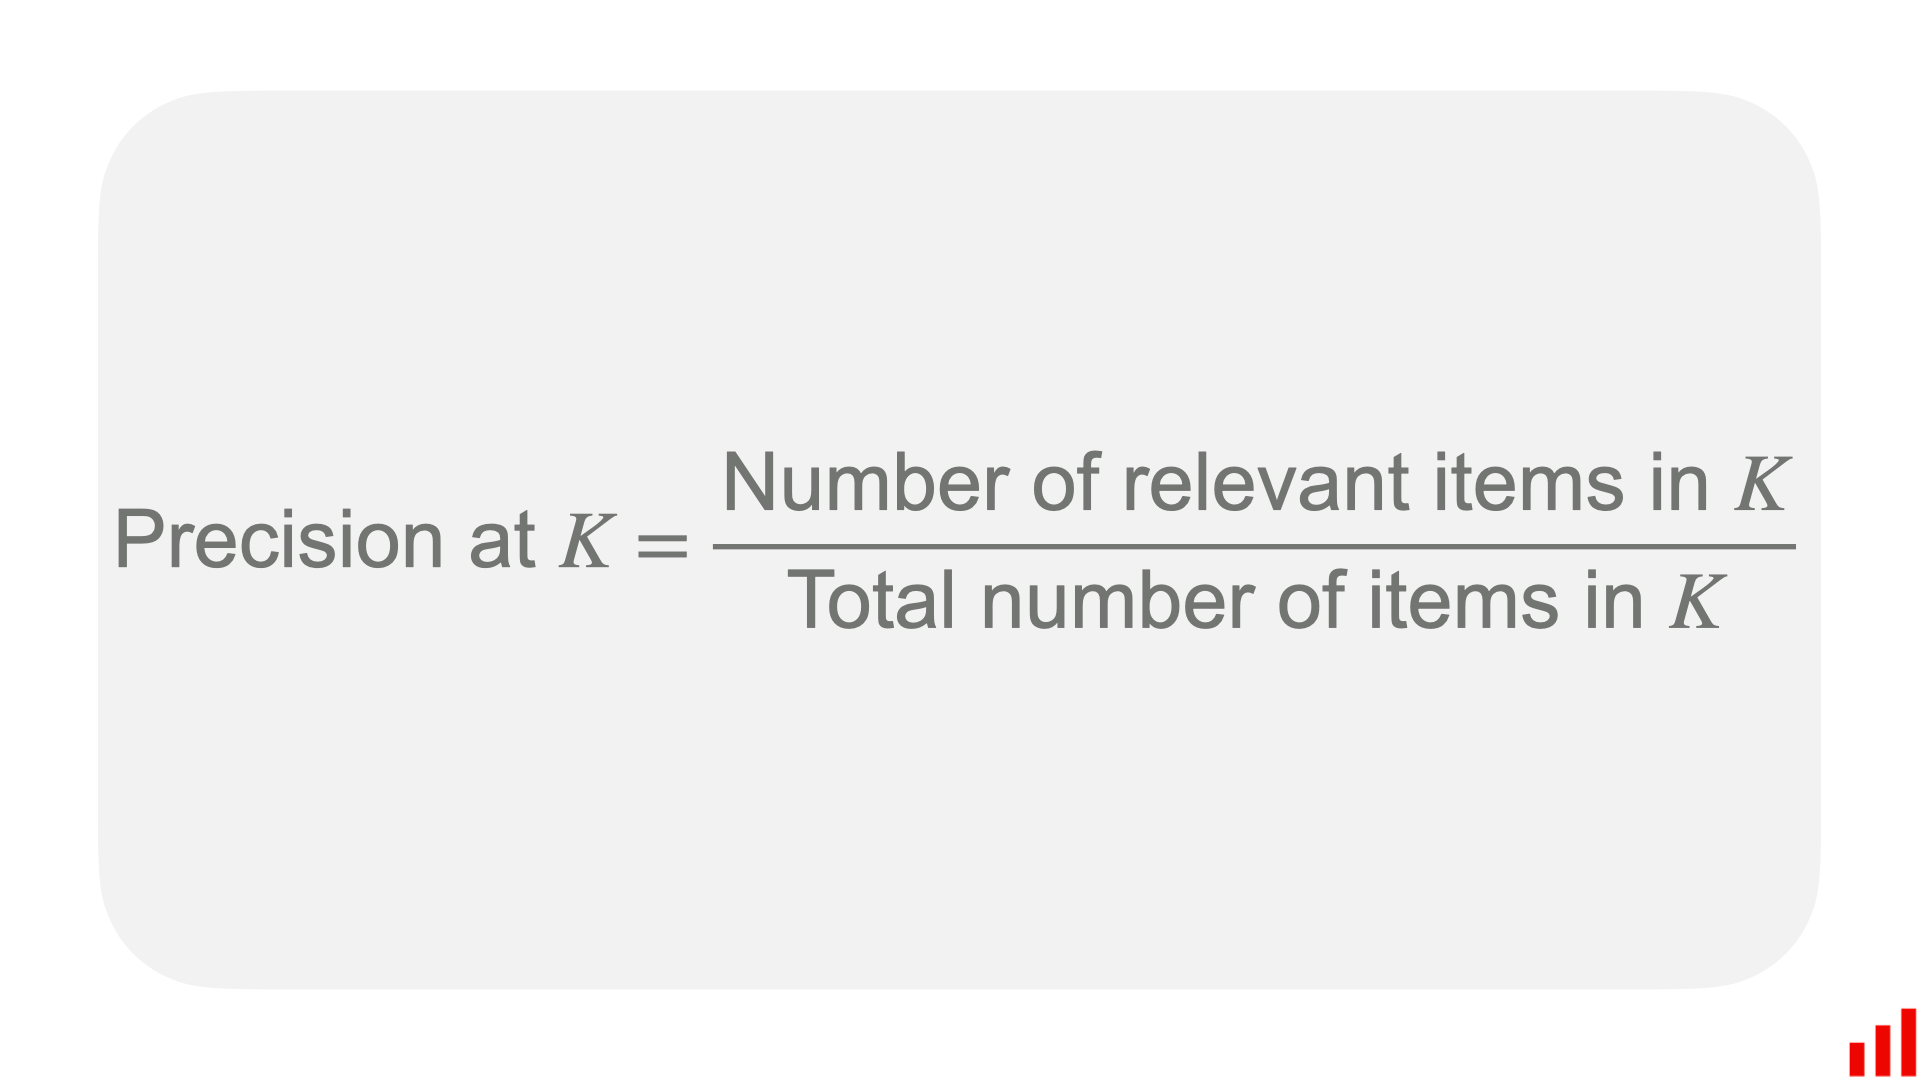

$$
\text{Precision@K} = \frac{TP}{TP + FP}
$$

$$
TP + FP = K \implies \text{Precision@K} = \frac{TP}{K}
$$

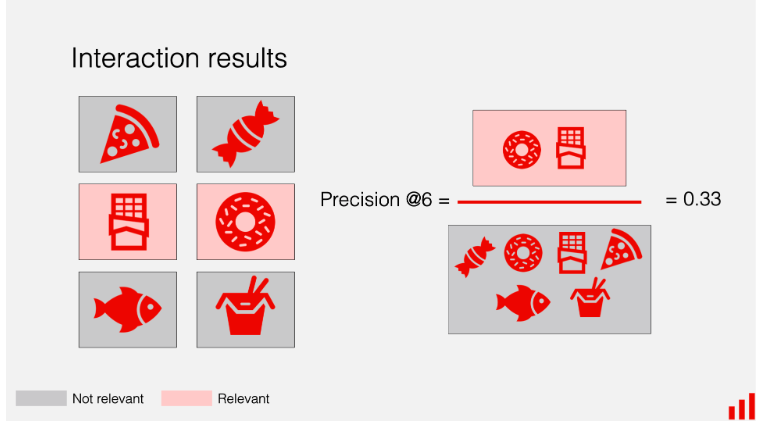

In [28]:
import numpy as np

def precission_at_k(y_true: np.array, y_pred: np.array, k: int) -> float:
    """
    y_true: истинные метки
    y_pred: предсказанные таблицы
    k: порог отсечения
    """

    if sum(y_true) == 0:
        return -1

    argsort = np.argsort(y_pred)
    y_true_sorted = y_true[argsort]
    true_positives = y_true_sorted[:k].sum()

    return true_positives / k

y_true = np.array([1, 0, 0, 1, 0, 0])
y_pred = np.array([0, 0, 1, 1, 0, 0])

precission_at_k(y_true, y_pred, k = 4)

0.25

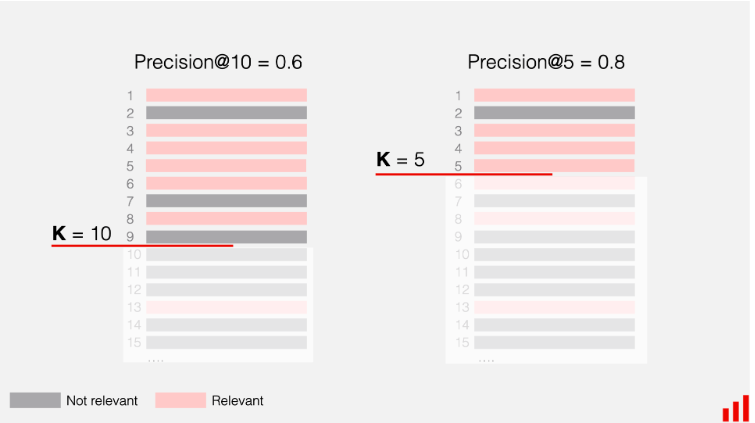

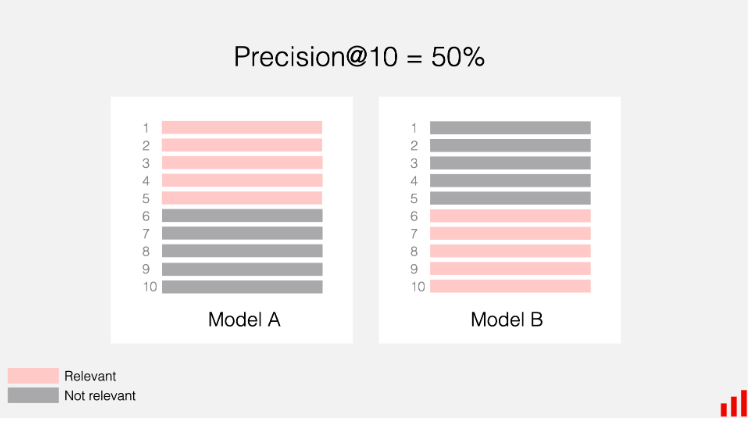

### Recall

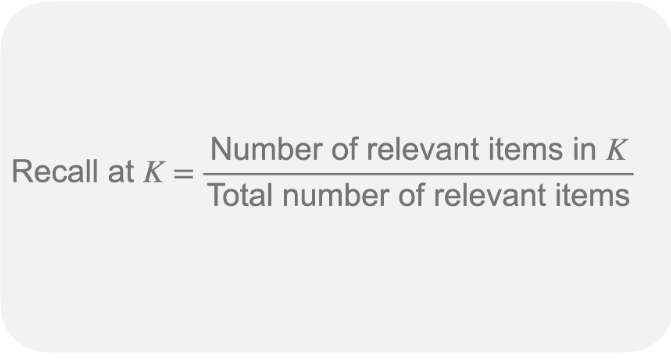

$$
\text{Recall@K} = \frac{TP}{TP + FN}
$$

где \( TP + FN \) - количество известных взаимодействий (релевантных элементов).

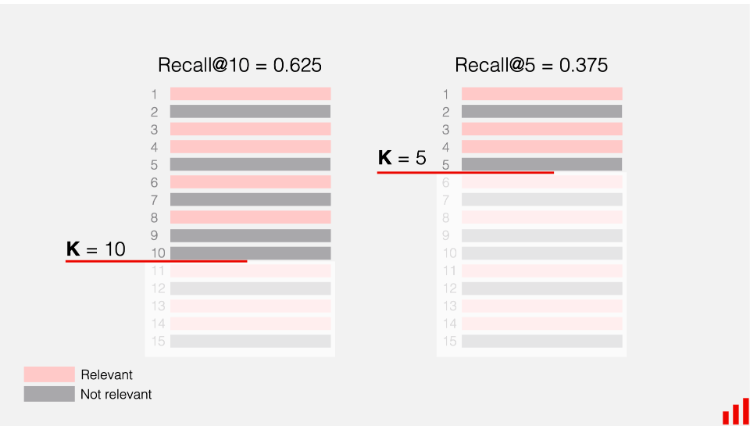

...ваш код тут...

### Введение в ранжирующие метрики в рекомендательных системах

В рекомендательных системах стандартные метрики регрессии и классификации оценивают точность предсказаний, но не учитывают истинную релевантность элементов. Однако для таких задач важно не только наличие положительных взаимодействий, но и чтобы релевантные элементы были выше в списке.

Поэтому используются ранжирующие метрики, которые учитывают и положительные взаимодействия, и порядок релевантности. Среди популярных метрик:

- **Средний обратный ранг (MRR)**
- **Средняя точность (MAP)**
- **Нормализованный дисконтированный кумулятивный прирост (NDCG)**

- **Mean Reciprocal Rank (MRR)** — это среднее значение обратного ранга. Формула выглядит следующим образом:
$$
MRR = \frac{1}{N} \sum_{i=1}^{N} \frac{1}{\text{rank}_i}
$$

| user_id | rekkos_list                     | interaction | rank | reciprocal rank |
|---------|---------------------------------|-------------|------|-----------------|
| 1       | [batman, гарри поттер, озарк]   | batman      | 1    | 1/1             |
| 2       | [озарк, тор, что-то]            | что-то      | 3    | 1/3             |
| 3       | [что-то, гарри поттер, batman]  | Нет         | 0    | 0               |

Итак, согласно нашей формуле, 
$$ 
MRR = \left( \frac{1}{1} + \frac{1}{3} + 0 \right)/3 = 0.44 
$$
Имейте в виду, что учитывается только ранг первого релевантного ответа, возможные другие релевантные ответы игнорируются.

In [29]:
def calculate_mrr(rekkos_list, y_true):
    reciprocal_ranks = []
    
    for i, true_value in enumerate(y_true):
        if true_value in rekkos_list[i]:
            rank = rekkos_list[i].index(true_value) + 1
            reciprocal_ranks.append(1 / rank)
        else:
            reciprocal_ranks.append(0)
    
    return sum(reciprocal_ranks) / len(reciprocal_ranks)

rekkos_list = [['batman', 'гарри поттер', 'озарк'], 
               ['озарк', 'тор', 'что-то'], 
               ['что-то', 'гарри поттер', 'batman']]

y_true = ['batman', 'что-то', None]

mrr = calculate_mrr(rekkos_list, y_true)
print(f'MRR: {mrr:.2f}')

MRR: 0.44


### MAP@K

- **Mean Average Precision (MAP@K)** — средняя точность по пользователям. Формула разделена на две части:
$$
MAP@K = \frac{1}{N} \sum_{i=1}^{N} AP@K(\text{user}_i)
$$
- **Average Precision at K (AP@K)**:
$$
AP@K = \frac{1}{r_{\text{user}}} \sum_{i=1}^{K} Precision@i \times rel_i
$$
где \( K \) — количество рекомендаций, r_user — количество релевантных объектов для пользователя.

| user_id | movie      | interaction | Precision@K |
|---------|------------|-------------|-------------|
| 1       | ozark      | 1           | 1/1         |
| 1       | batman     | 0           | 1/2         |
| 1       | harry      | 0           | 1/3         |
| 1       | thor       | 1           | 2/4         |
| 1       | something  | 0           | 2/5         |
| 1       | something2 | 0           | 2/6         |

AP@6 = 
$$
\frac{1}{2} \times \left( \frac{1}{1} \times 1 + \frac{1}{2} \times 0 + \frac{1}{3} \times 0 + \frac{2}{4} \times 1 + \frac{2}{5} \times 0 + \frac{2}{6} \times 0 \right) = 0.75
$$
Общее количество релевантных объектов для пользователя равно 2, поэтому мы умножаем на 1/2. Рассматривая первый ранг, мы видим, что пользователь взаимодействовал с нашей рекомендацией, и согласно нашей формуле, мы получаем 1/1 и умножаем на релевантность 1. Далее, в следующем случае у нас нет взаимодействия, наш Precision@2 равен 1/2, и умножая на релевантность 0, мы получаем 0. Далее, мы делаем ту же логику и приходим к результирующему значению 0.75 MAP@6 (так как у нас только 1 пользователь в примере). Код опирается на Precision@K из вышеуказанного, но если хотите — можете добавить его сами.


In [30]:
import numpy as np

def apk(recs, rels):
    x = 0
    sum = 0
    for i, rec_id in enumerate(recs):
        is_rel = (rec_id in rels)
        mult = 1 if is_rel else 0
        if is_rel:
            x += 1
        sum += mult * (x / (i+1))
    
    return sum / min(len(rels), len(recs))

all_recs = [[1,2,3,4,5,6]]
all_rels = [[1,4]]

def mapk(all_recs, all_rels):
    sum = 0
    for recs, rels in zip(all_recs, all_rels):
        sum += apk(recs, rels)
    return sum / len(all_recs)

mapk(all_recs, all_rels)

0.75

# Фильтрация на основе содержимого

### 📚 Кандидаты для рекомендаций

В этом разделе рассмотрим простой способ генерации кандидатов для рекомендаций. Один из методов — контентная фильтрация, которую мы обсудим на примере и рассмотрим библиотеку для её реализации. Перед этим нужно понять, что такое эмбеддинги и как они используются для вычисления **сходства**. Сходство рассчитывается с помощью косинусного расстояния между двумя массивами данных.

# Эмбеддинги

### 🍽️ Модель рекомендаций по питанию

Мы разрабатываем ML-модель, которая предсказывает сходство продуктов питания для высококачественных рекомендаций. Пользователи вводят свои любимые блюда, и приложение предлагает похожие варианты. Для обучения модели собран набор данных из 5000 популярных блюд, таких как борщ, хот-дог, салат, пицца и шаурма.


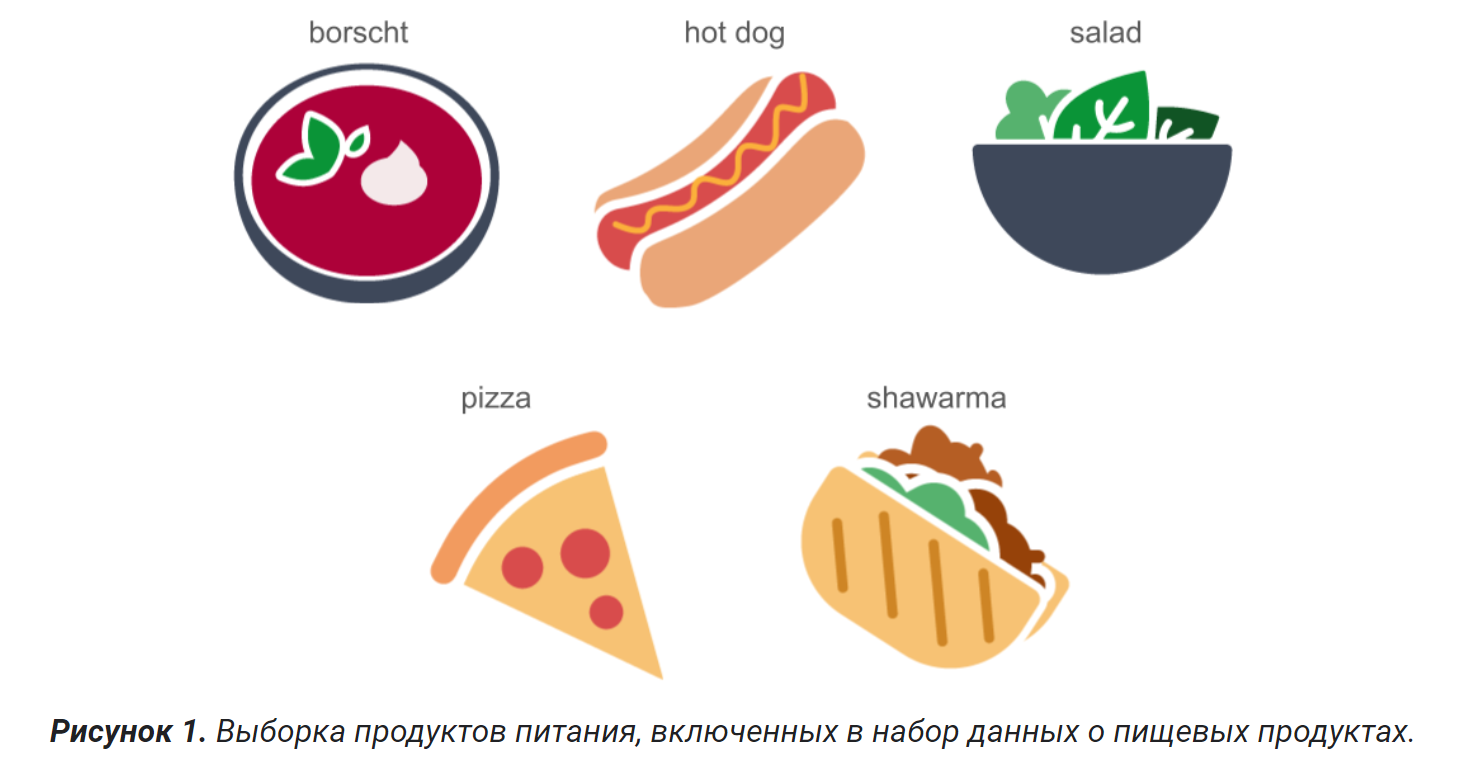

Вы создаете объект meal , который содержит представление каждого блюда в наборе данных в горячем коде .

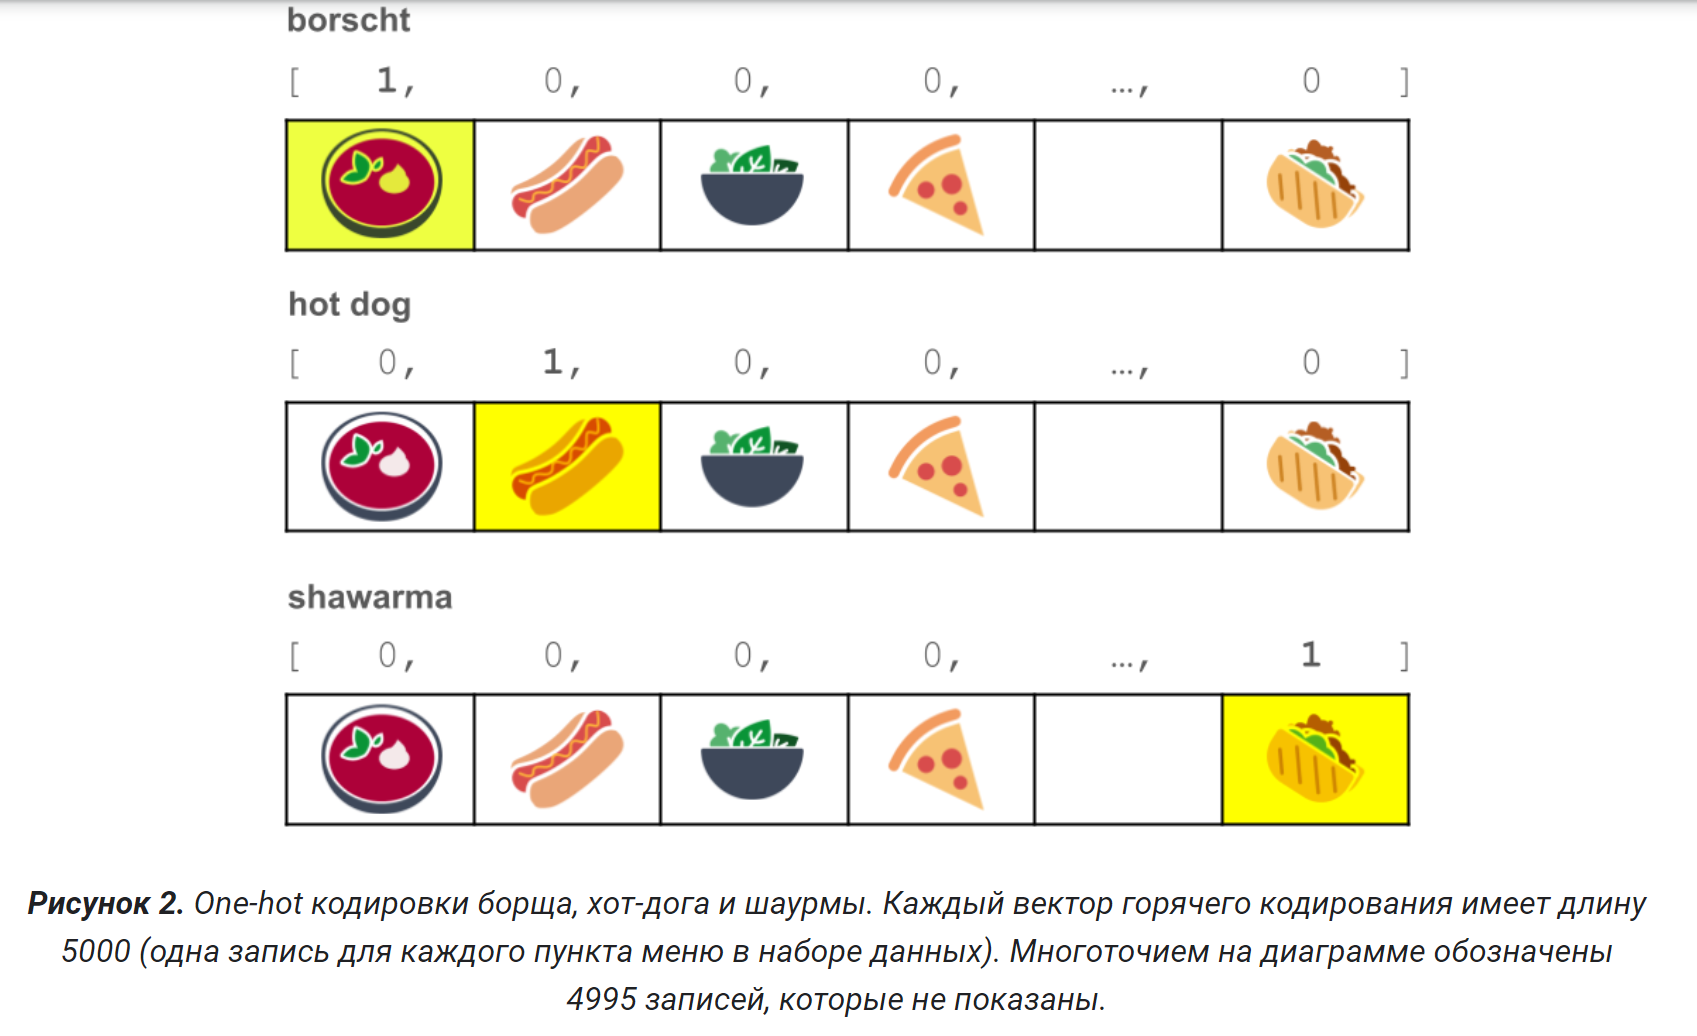

# Подводные камни разреженных представлений данных
Просматривая эти горячие кодировки, вы замечаете две ключевые проблемы с таким представлением данных.

### ⚙️ Проблемы с количеством весов и их решение

Большие входные векторы означают огромное количество весов для нейросети, что приводит к следующим проблемам:

- **Количество весов:** С M записями и N узлами в первом слое, модель должна обучить веса размером MxN, что требует большого объема данных.
- **Объем вычислений:** Чем больше весов, тем больше вычислительных ресурсов необходимо.
- **Объем памяти:** Большое количество весов требует значительного объема памяти, что затрудняет масштабирование.
- **Отсутствие связей:** Горячие кодировки не отражают сходство между продуктами питания.

Вложение — это относительно маломерное пространство, в которое можно переводить многомерные векторы. 

Чтобы дать представление о том, как векторы внедрения представляют информацию, рассмотрим следующее одномерное представление блюд: хот-дог , пицца , салат , шаурма и борщ по шкале от «наименее похоже на сэндвич » до «наиболее похоже на сэндвич». " «Сэндвичность» — это единственное измерение.

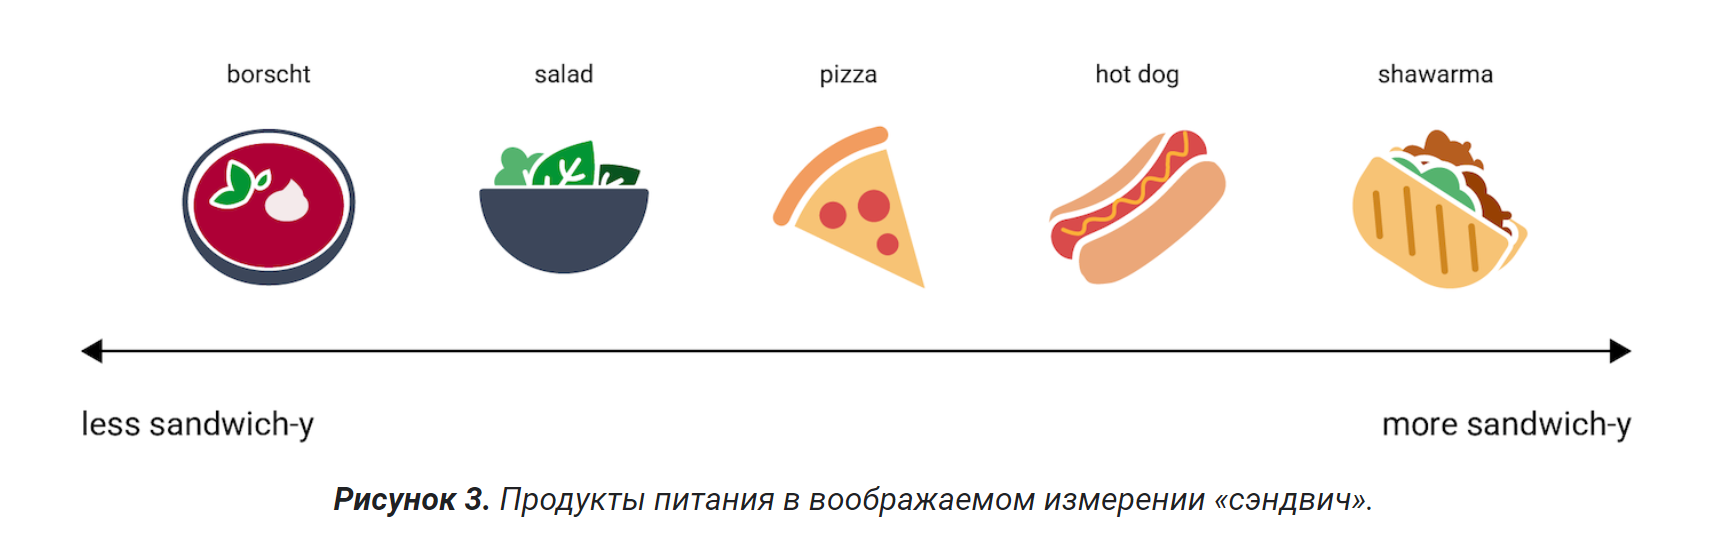

### 🍰 Позиционирование яблочного штруделя

Где на этой линии окажется яблочный штрудель? Его можно разместить между **hot dog** и **shawarma**. Однако штрудель также имеет дополнительный аспект сладости и десертности, что сильно отличает его от других блюд. Это показано добавлением измерения «десертность» на следующем рисунке.

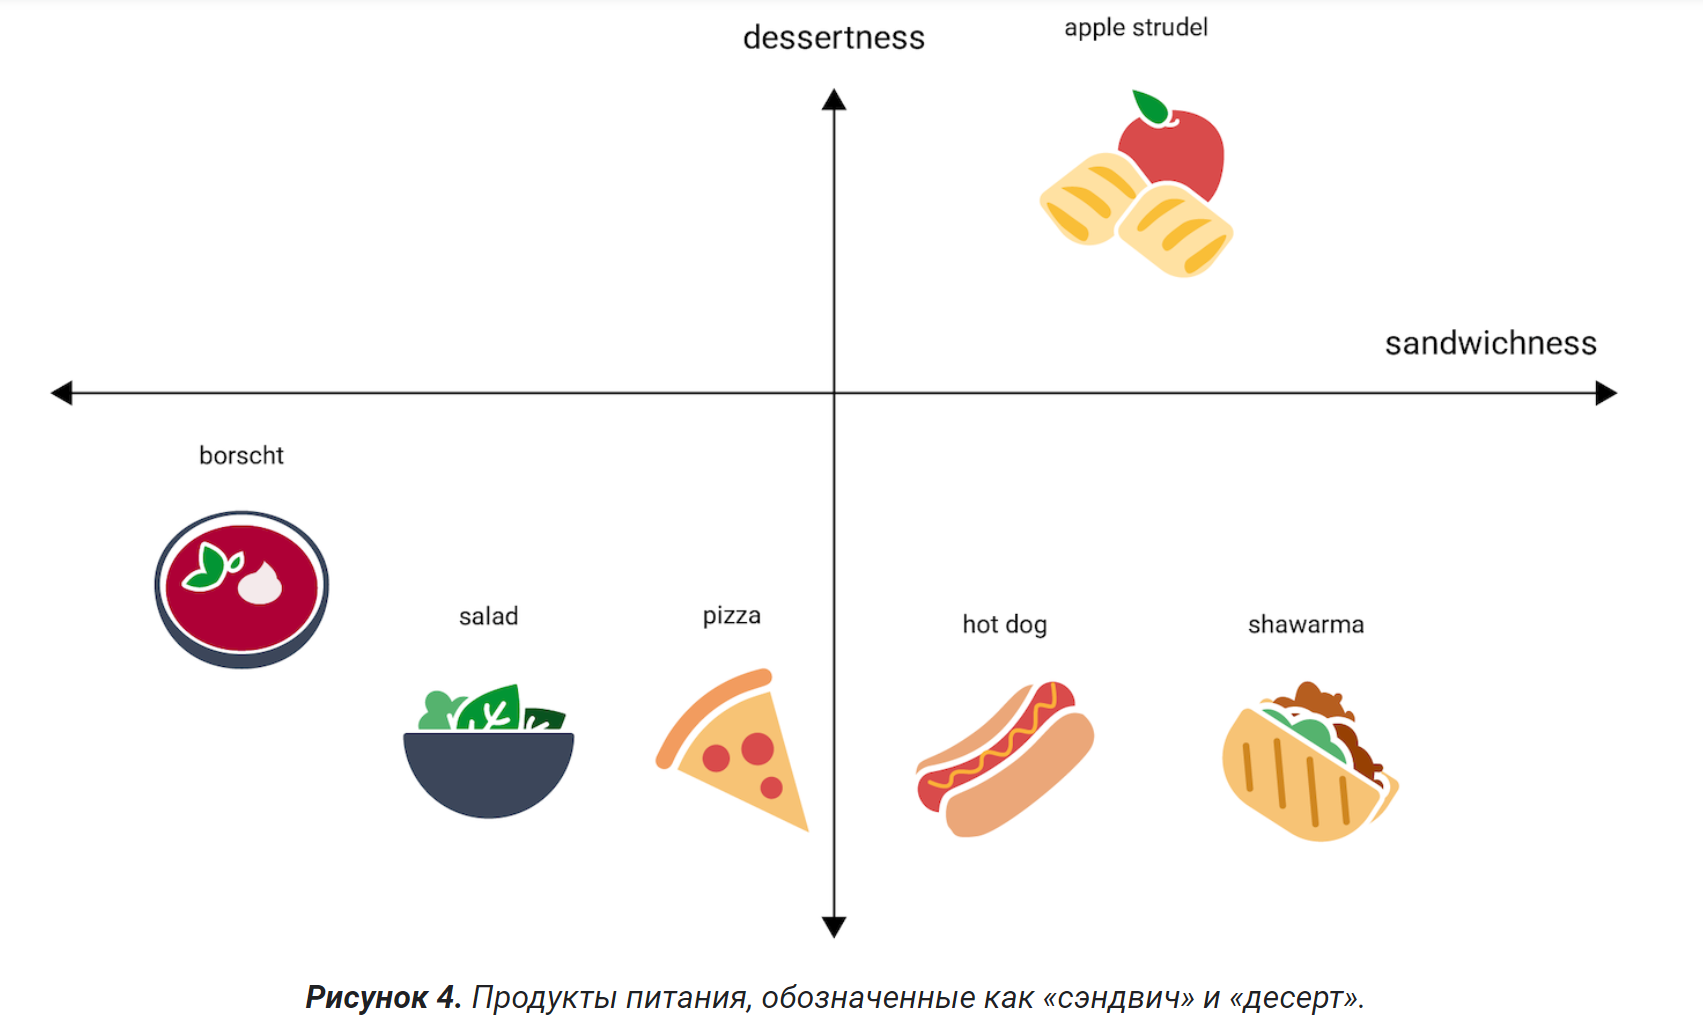

### 🌐 Вложение элементов в n-мерное пространство

Вложение представляет каждый элемент в n-мерном пространстве с помощью n чисел с плавающей запятой (обычно от –1 до 1 или от 0 до 1). Например, на рисунке 4 элементы питания представлены в двумерном пространстве:

- **Яблочный штрудель** находится в правом верхнем квадранте и может иметь координаты (0.5, 0.3).
- **Хот-дог** находится в правом нижнем квадранте с координатами (0.2, –0.5).

Расстояние между любыми двумя элементами можно рассчитать и интерпретировать как их относительное сходство. Близко расположенные элементы, например **shawarma** и **hot dog**, более схожи, чем отдаленные, такие как **apple strudel** и **borscht**.


### 🔄 Визуализация в 2D и 3D пространстве

Обратите внимание, что в 2D-пространстве на рисунке 4 **apple strudel** находится значительно дальше от **shawarma** и **hot dog**, чем в 1D-пространстве. Это соответствует интуиции: **apple strudel** менее похож на **hot dog** и **shawarma**, чем они друг на друга.

Теперь рассмотрим **борщ**, который гораздо более жидкий, чем другие продукты. Это предполагает добавление третьего измерения — **ликвидности** (насколько жидкая пища). В 3D-пространстве предметы можно визуализировать следующим образом:


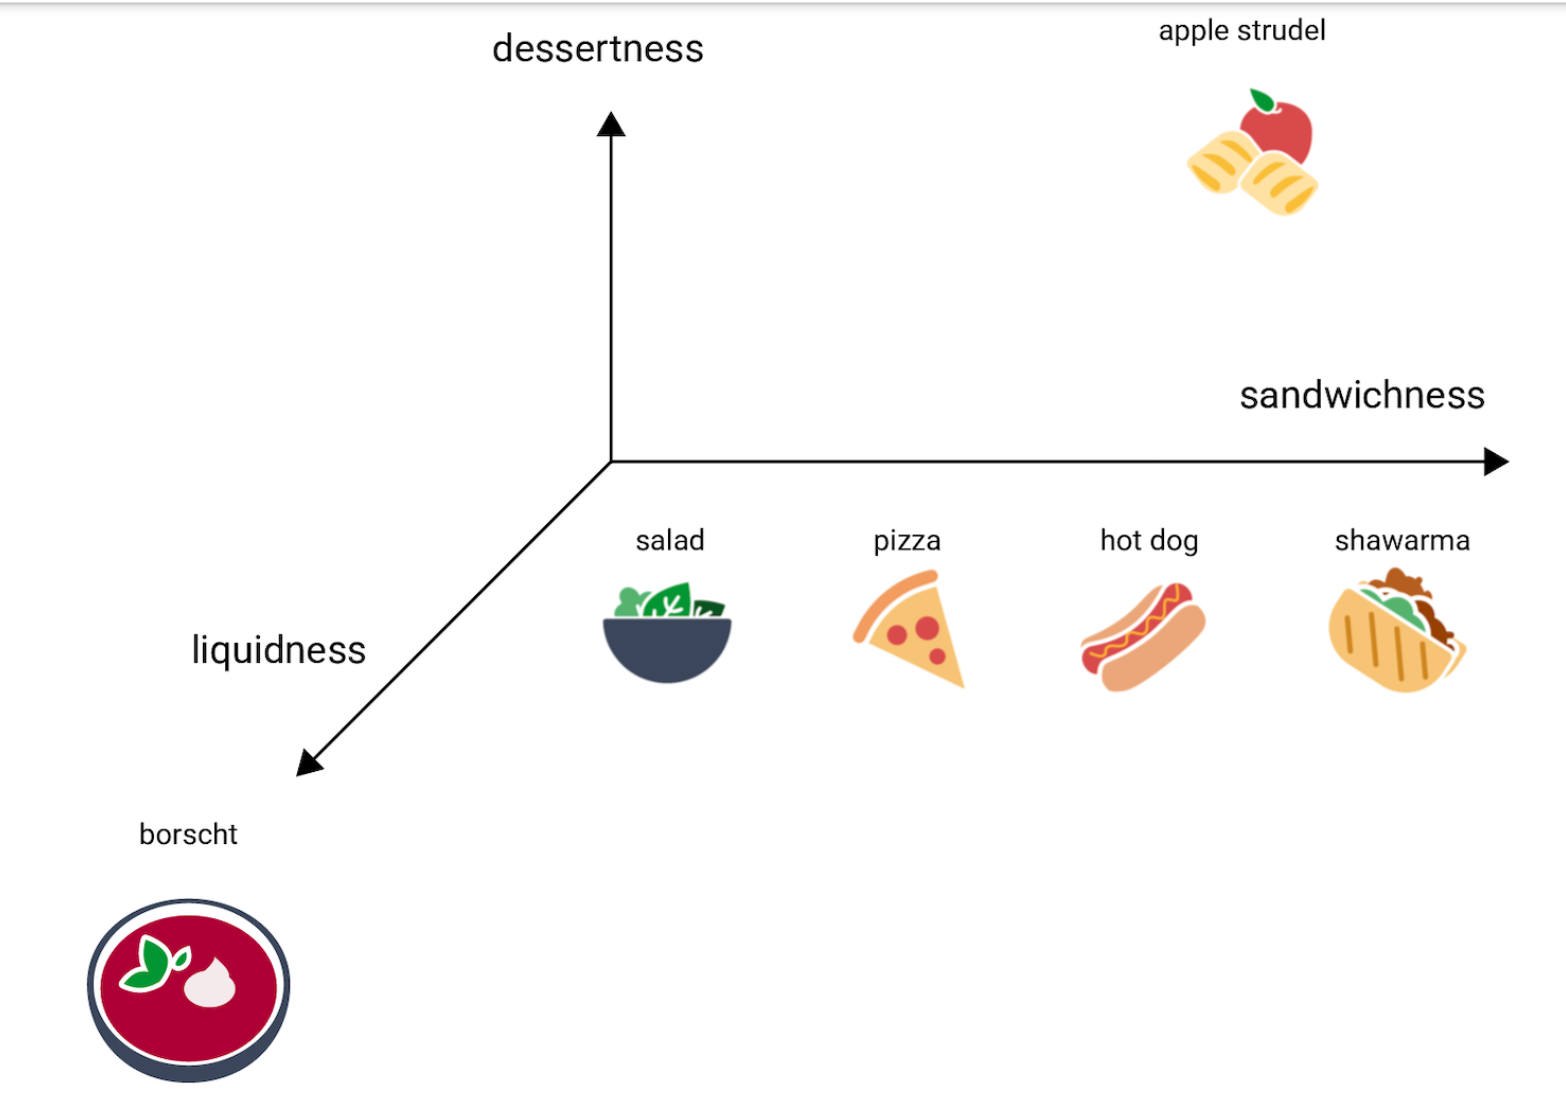

Куда в этом трехмерном пространстве пойдет Танюань ? Это густой суп, как борщ, и сладкий десерт, как яблочный штрудель, и уж точно не бутерброд. Вот одно из возможных мест размещения:



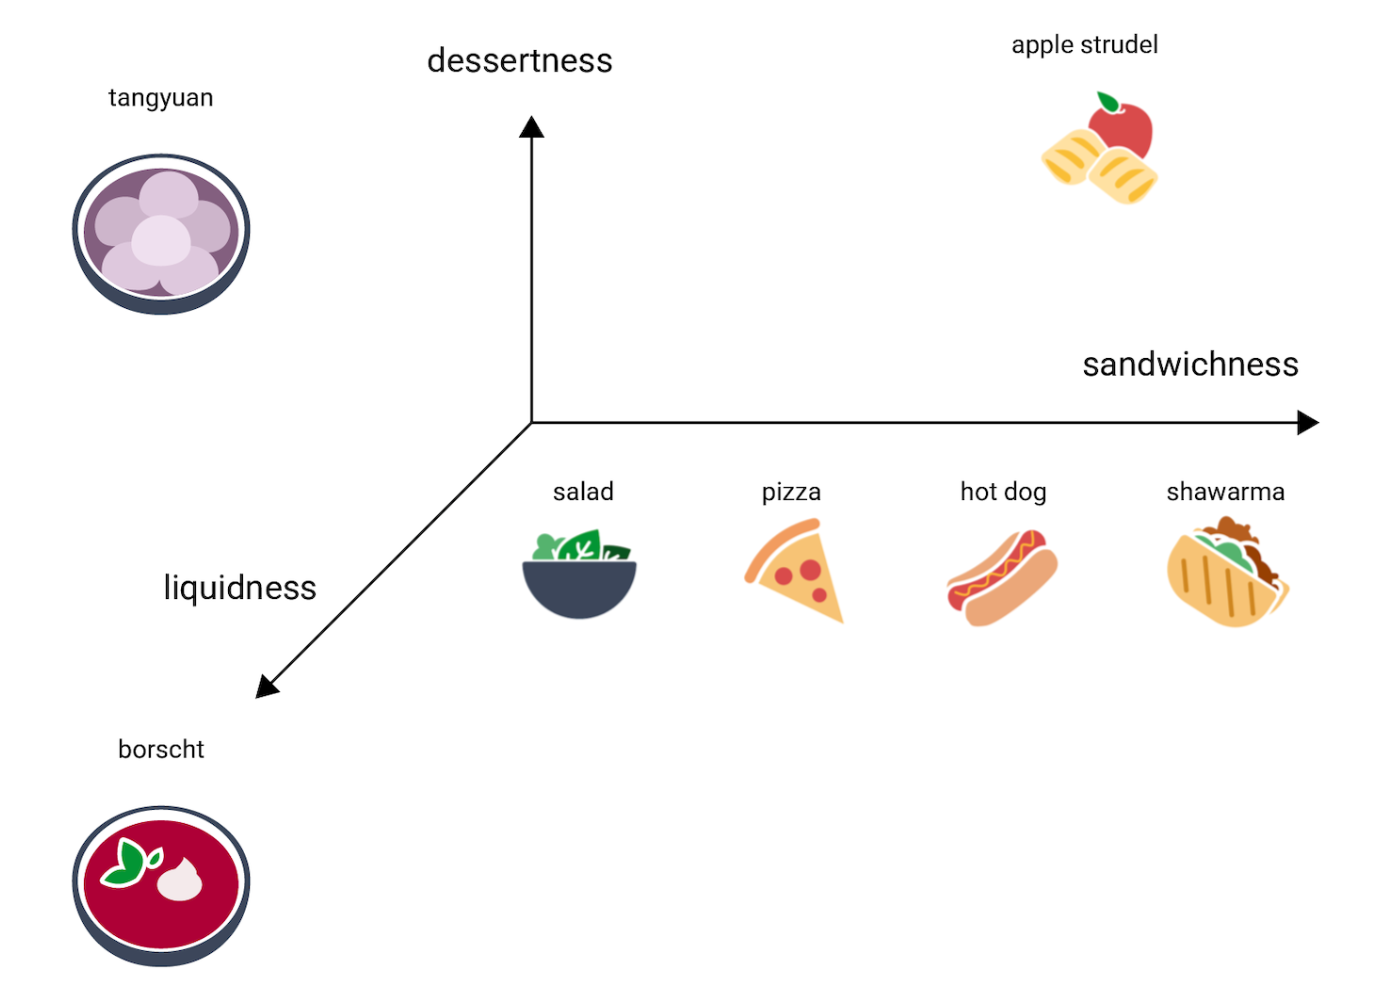

Обратите внимание, сколько информации выражается в этих трех измерениях. Вы можете представить себе дополнительные аспекты, такие как мясистость или запеченность .

# Реальные пространства для встраивания

### 🌍 Многомерное пространство и семантические связи

Как видно на примерах продуктов питания, даже небольшое многомерное пространство позволяет группировать семантически схожие элементы и держать разнородные далеко друг от друга. Положение в векторном пространстве может кодировать семантику при хорошем встраивании.

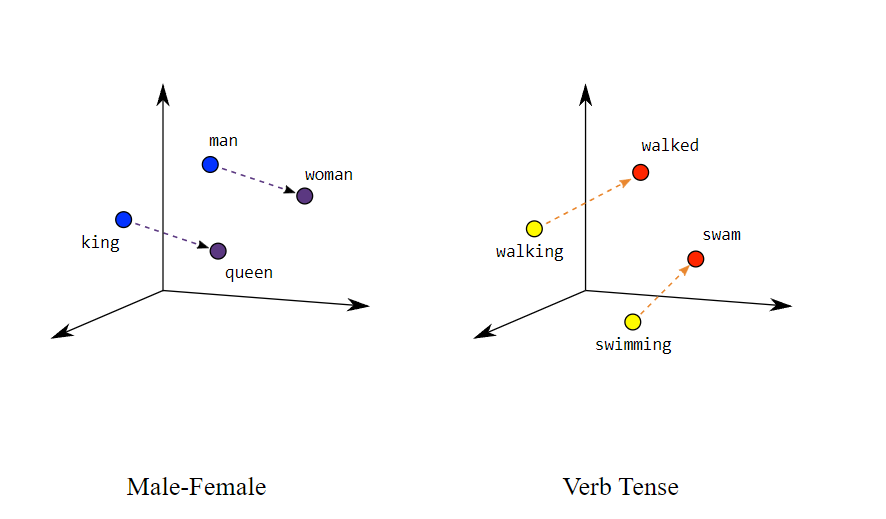

https://projector.tensorflow.org/?hl=ru

# Тоже самое для документов

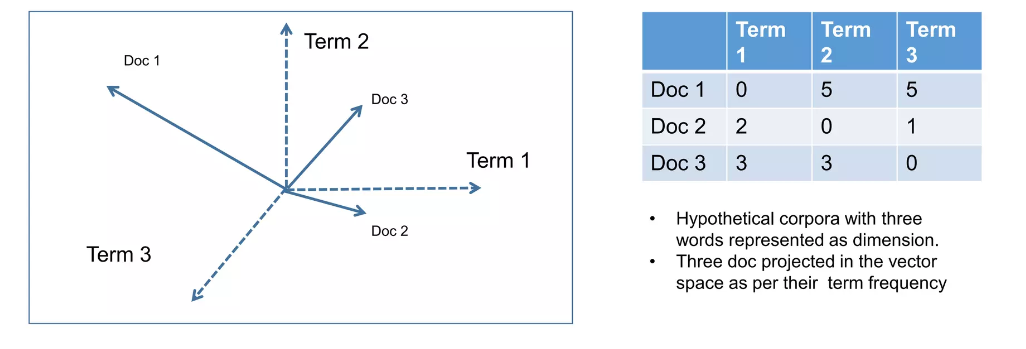

# Фильтрация на основе контента

### 🎬 Обзор контентной фильтрации

Контентная фильтрация широко используется для рекомендаций фильмов, музыки, ресторанов и туристических направлений. Эта система рекомендаций предлагает пользователям элементы на основе их прошлых предпочтений и поведения.

Она анализирует предпочтения пользователя, такие как жанр, режиссёр или актёр, и рекомендует элементы с похожими характеристиками. Например, если пользователю нравятся романтические комедии с Джулией Робертс, система предложит похожие фильмы или другие картины с участием схожих актёров или режиссёров.

Этот метод основывается на предположении, что пользователи, которым понравился один элемент, вероятно, будут любить похожие. Система определяет атрибуты элементов, с которыми взаимодействовал пользователь, и находит другие с похожими характеристиками для рекомендации. Например, если пользователь слушает песни Тейлор Свифт, система может предложить другие песни Тейлор Свифт или похожих исполнителей. В индустрии это часто представляется как рекомендации "Похожие на…", которые воспринимаются как персонализированные и увеличивают вовлечённость пользователя.

Далее мы перейдём к кодированию и создадим простую модель Word2Vec с использованием библиотеки gensim. Подробное объяснение логики Word2Vec можно найти в другом месте; здесь мы не будем обсуждать детали реализации.


In [31]:
MOVIES_METADATA_URL = 'https://drive.google.com/file/d/19g6-apYbZb5D-wRj4L7aYKhxS-fDM4Fb/view?usp=share_link'

In [32]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import re
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
from ast import literal_eval
from pymystem3 import Mystem
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trill\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
def read_csv_from_gdrive(url):
    """
    gets csv data from a given url (taken from file -> share -> copy link)
    :url: example https://drive.google.com/file/d/1BlZfCLLs5A13tbNSJZ1GPkHLWQOnPlE4/view?usp=share_link
    """
    file_id = url.split('/')[-2]
    file_path = 'https://drive.google.com/uc?export=download&id=' + file_id
    data = pd.read_csv(file_path)

    return data

In [34]:
# init lemmatizer to avoid slow performance
mystem = Mystem() 

def word_tokenize_clean(doc: str, stop_words: list):
    '''
    tokenize from string to list of words
    '''

    # split into lower case word tokens \w lemmatization
    tokens = list(set(mystem.lemmatize(doc.lower())))
  
    # remove tokens that are not alphabetic (including punctuation) and not a stop word
    tokens = [word for word in tokens if word.isalpha() and not word in stop_words \
              not in list(punctuation)]
    return tokens

## Подготовка данных

In [35]:
# read csv information about films etc
movies_metadata = read_csv_from_gdrive(MOVIES_METADATA_URL)
movies_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [36]:
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.00,81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,5415.00
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.00,104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90,2413.00
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.00,101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50,92.00
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.00,127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10,34.00
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.00,106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70,173.00


### 🛠️ Текстовая предобработка для точных результатов

Чтобы получить точные результаты, необходимо выполнить предобработку текста. Пайплайн будет следующим:

1. **Фильтрация данных:** Оставляем только необходимые колонки из `movies_metadata`: `id`, `original_title`, `overview`.
2. **Определение `model_index`:** Создание индекса для модели, чтобы сопоставить его с колонкой `id`.
3. **Очистка текста:**
   - Удаление стоп-слов и знаков препинания.
   - Лемматизация для дальнейшей токенизации.
   - Создание размеченного документа, необходимого для `gensim.Doc2Vec`.


In [37]:
sample = movies_metadata[['id', 'original_title', 'overview']].copy()
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              45466 non-null  object
 1   original_title  45466 non-null  object
 2   overview        44512 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


In [38]:
# как вы видите сверху, в некоторых случаях обзор отсутствует - давайте заполним его оригинальным названием
sample.loc[sample['overview'].isnull(), 'overview'] = sample.loc[sample['overview'].isnull(), 'original_title']
sample.isnull().sum()

id                0
original_title    0
overview          0
dtype: int64

In [39]:
# определите model_index и сделайте его строкой
sample = sample.reset_index().rename(columns = {'index': 'model_index'})
sample['model_index'] = sample['model_index'].astype(str)
sample.head(5)

,model_index,id,original_title,overview
0,0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,1,8844,Jumanji,When siblings Judy and Peter discover an encha...
2,2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...


In [40]:
# создадим маппер с названием и моделью_idnex, чтобы использовать его в дальнейшем при оценке
movies_inv_mapper = dict(zip(sample['original_title'].str.lower(), sample['model_index'].astype(int)))
movies_inv_mapper

{'toy story': 0,
 'jumanji': 1,
 'grumpier old men': 2,
 'waiting to exhale': 3,
 'father of the bride part ii': 4,
 'heat': 29042,
 'sabrina': 888,
 'tom and huck': 7,
 'sudden death': 8,
 'goldeneye': 9,
 'the american president': 10,
 'dracula: dead and loving it': 11,
 'balto': 12,
 'nixon': 13,
 'cutthroat island': 14,
 'casino': 15,
 'sense and sensibility': 41042,
 'four rooms': 17,
 'ace ventura: when nature calls': 18,
 'money train': 19,
 'get shorty': 20,
 'copycat': 21,
 'assassins': 22,
 'powder': 23,
 'leaving las vegas': 24,
 'othello': 21274,
 'now and then': 26,
 'persuasion': 40837,
 'la cité des enfants perdus': 28,
 '摇啊摇，摇到外婆桥': 29,
 'dangerous minds': 30,
 'twelve monkeys': 31,
 'guillaumet, les ailes du courage': 32,
 'babe': 33,
 'carrington': 34,
 'dead man walking': 35,
 'across the sea of time': 36,
 'it takes two': 29129,
 'clueless': 38,
 'cry, the beloved country': 26667,
 'richard iii': 17719,
 'dead presidents': 41,
 'restoration': 38571,
 'mortal kombat'

In [41]:
# предварительная обработка путем удаления несимвольных данных, стоп-слов
tags_corpus = sample['overview'].values
tags_corpus = [re.sub('-[!/()0-9]', '', x) for x in tags_corpus]
stop_words = stopwords.words('english')

tags_doc = [word_tokenize_clean(description, stop_words) for description in tags_corpus]
tags_corpus[:1]

["Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."]

In [42]:
tags_doc = [TaggedDocument(words = word_tokenize_clean(D, stop_words), tags = [str(i)]) for i, D in enumerate(tags_corpus)]
tags_doc[1]

TaggedDocument(words=['monkeys', 'alan', 'proves', 'finish', 'risky', 'giant', 'evil', 'hope', 'trapped', 'adult', 'judy', 'world', 'three', 'inside', 'find', 'discover', 'freedom', 'door', 'peter', 'game', 'years', 'magical', 'terrifying', 'opens', 'invite', 'living', 'running', 'rhinoceroses', 'creatures', 'unwittingly', 'room', 'siblings', 'board', 'enchanted'], tags=['1'])

# Обучение и оценка моделей

In [43]:
VEC_SIZE = 50 # длина вектора для каждого фильма
ALPHA = .02 # параметр обучения модели
MIN_ALPHA = .00025 # параметр обучения модели
MIN_COUNT = 4 # минимальное количество вхождений слова в словарь
EPOCHS = 20 # количество тренировок

In [44]:
# инициализировать модель
model = Doc2Vec(vector_size = VEC_SIZE,
                alpha = ALPHA, 
                min_alpha = MIN_ALPHA,
                min_count = MIN_COUNT,
                dm = 0)

In [45]:
# создайте словарь из всех документов по тегам
model.build_vocab(tags_doc)

# обучить модель
model.train(tags_doc,
            total_examples = model.corpus_count,
            epochs = EPOCHS)

In [46]:
movie_id = movies_inv_mapper['jumanji']
movie_id

1

In [47]:
movies_vectors = model.dv.vectors
movie_embeddings = movies_vectors[movie_id]

In [48]:
similars = model.docvecs.most_similar(positive = [movie_embeddings], topn = 20)
output = pd.DataFrame(similars, columns = ['model_index', 'model_score'])
output.head()

,model_index,model_score
0,1,1.00
1,28534,0.95
2,38689,0.94
3,12196,0.93
4,15331,0.93


In [49]:
name_mapper = {v: k for k, v in movies_inv_mapper.items()}
output['title_name'] = output['model_index'].astype(int).map(name_mapper)
output

,model_index,model_score,title_name
0,1,1.00,jumanji
1,28534,0.95,urban warriors
2,38689,0.94,zombieworld
3,12196,0.93,5ive girls
4,15331,0.93,bless the beasts & children
5,1002,0.93,bedknobs and broomsticks
6,30711,0.93,a la legión le gustan las mujeres... y a las m...
7,29340,0.93,toxin
8,12789,0.93,NaN
9,17936,0.92,devil times five


# Рекомендательные системы на основе коллаборативной фильтрации

In [2]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.base import BaseEstimator

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Рекомендательные системы используются повсеместно:
1. Онлайн-кинотеатры используют их чтобы предлагать пользователям новые фильмы.
2. Социальные сети предлагают новых друзей или формируют ленту на основе ваших предпочтений.
3. Музыкальные сервисы, онлайн-радио подбирают музыку специально для вас.
4. Интернет-магазины предлагают товары пользователям, которые могут их заинтересовать.

Рассмотрим построение такой системы на датасете от `GroupLens` $-$ [`MovieLens`](https://grouplens.org/datasets/movielens/):
Это набор данных из $27 000$ фильмов и $138 000$ пользователей, с общим количеством оценок в $20$ миллионов.

Но мы воспользуемся уменьшенной версией для быстроты вычислений: $9 000$ фильмов, $700$ пользователей, $100 000$ оценок.
Скачать напрямую датасет можно по этой [ссылке](http://files.grouplens.org/datasets/movielens/ml-latest-small.zip)

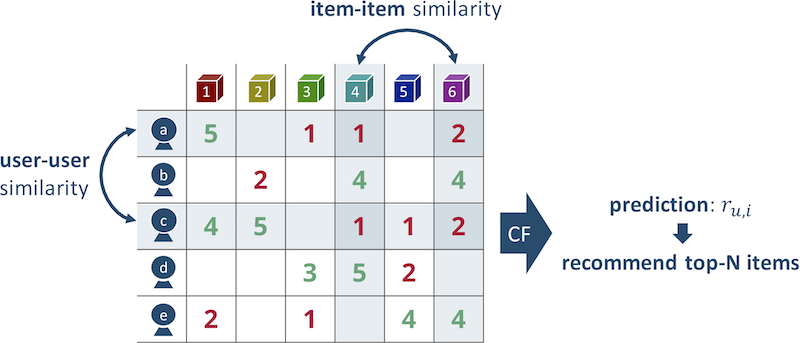

## Для начала немного посмотрим на данные
- `links.csv` $-$ связь между `id` фильма в датасете и `id` соответствующего фильма на `imdb.com` и `themoviedb.org`;
- `movies.csv` $-$ описание каждого фильма с его названием и жанрами;
- `ratings.csv` $-$ оценки пользователей фильмов с временной отметкой;
- `tags.csv` $-$ список тегов, которые поставил пользователь фильму, с временной отметкой.

Для данной задачи нам понадобятся только часть данных $-$ информация о том, какой рейтинг ставили пользователи фильмам.

In [3]:
RATINGS_SMALL_URL = 'http://drive.google.com/file/d/1BlZfCLLs5A13tbNSJZ1GPkHLWQOnPlE4/view?usp=share_link'
MOVIES_METADATA_URL = 'http://drive.google.com/file/d/19g6-apYbZb5D-wRj4L7aYKhxS-fDM4Fb/view?usp=share_link'

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from itertools import islice, cycle, product

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

def read_csv_from_gdrive(url):
    """
    получает данные в формате csv по заданному url (берется из меню file -> share -> copy link)
    :url: example https://drive.google.com/file/d/1BlZfCLLs5A13tbNSJZ1GPkHLWQOnPlE4/view?usp=share_link
    """
    file_id = url.split('/')[-2]
    file_path = 'https://drive.google.com/uc?export=download&id=' + file_id
    data = pd.read_csv(file_path)

    return data

ratings = read_csv_from_gdrive(RATINGS_SMALL_URL)
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.50,1260759144
1,1,1029,3.00,1260759179
2,1,1061,3.00,1260759182
3,1,1129,2.00,1260759185
4,1,1172,4.00,1260759205


In [4]:
ratings.rating.value_counts()

rating
4.00    28750
3.00    20064
5.00    15095
3.50    10538
4.50     7723
2.00     7271
2.50     4449
1.00     3326
1.50     1687
0.50     1101
Name: count, dtype: int64

### О метрике
Для рекомендательных систем используются стандартные метрики: `MSE`, `MAE` и `RMSE`.

Мы воспользуемся `RMSE`: классическая метрика для задач рекомендации после прошедшего [Netflix Prize](https://ru.wikipedia.org/wiki/Netflix_Prize). Хотя и у неё есть свои минусы, например:
- Ошибка в предсказании высокой оценки имеет такой же вес, что и ошибка в предсказании низкой оценки (предсказание 10 вместо 7 хуже, чем предсказать 4 вместо 1);
- Помимо предсказания рейтинга очень важно подать пользователю фильмы в нужном порядке, то есть необходимо учитывать и ранжирование, что данная метрика не умеет.

Так же сразу отложим часть выборки для тестирования модели по принципу: для каждого пользователя отрежем последние 20% оценок.

In [5]:
rmse = lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))

def train_test_split(X, ratio=0.2, user_col='userId', item_col='movieId',
                     rating_col='rating', time_col='timestamp'):
    # сортируем оценки по времени
    X.sort_values(by=[time_col], inplace=True)
    # список всех юзеров
    userIds = X[user_col].unique()
    X_train_data = []
    X_test_data = []
    y_train = []
    y_test = []
    for userId in tqdm_notebook(userIds):
        curUser = X[X[user_col] == userId]
        # определяем позицию, по которой делим выборку и размещаем данные по массивам
        idx = int(curUser.shape[0] * (1 - ratio))
        X_train_data.append(curUser[[user_col, item_col]].iloc[:idx, :].values)
        X_test_data.append(curUser[[user_col, item_col]].iloc[idx:, :].values)
        y_train.append(curUser[rating_col].values[:idx])
        y_test.append(curUser[rating_col].values[idx:])
    # cтекуем данные по каждому пользователю в общие массивы
    X_train = pd.DataFrame(np.vstack(X_train_data), columns=[user_col, item_col])
    X_test = pd.DataFrame(np.vstack(X_test_data), columns=[user_col, item_col])
    y_train = np.hstack(y_train)
    y_test = np.hstack(y_test)
    return X_train, X_test, y_train, y_test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(ratings)

  0%|          | 0/671 [00:00<?, ?it/s]

In [7]:
X_train.shape, len(y_train), X_test.shape, len(y_test)

((79748, 2), 79748, (20256, 2), 20256)

In [8]:
X_train.userId.nunique()

671

In [9]:
X_test

,userId,movieId
0,383,1419
1,383,457
2,383,150
3,383,110
4,383,356
...,...,...
20251,251,56587
20252,251,134853
20253,251,81847
20254,251,6377


# Collaborative filtering
# User-based model

[Выжимка на Хабр](https://habr.com/ru/company/surfingbird/blog/139518/)


**User-based model** является моделью коллабораивной фильтрации, основная идея которой **похожим пользователям обычно нравятся похожие объекты**

Идею алгоритма можно сформулировать следующим образом:

* Найти, насколько другие пользователи в базе данных похожи на данного пользователя.

* По оценкам других пользователей предсказать, какую оценку даст данный пользователь данному продукту, учитывая с большим весом тех пользователей, которые больше похожи на данного.


Определять схожесть двух пользователей будем с помощью корреляции Пирсона между векторами уже поставленными оценками. Отметим, что для двух различных пользователей оценка может иметь различный вес, так для одного фильмы в среднем имеют рейтинг $2$, а для другого - $4$. Такие пользователи похожи, но корреляция скажет, что они различны. Чтобы устранить это, давайте из всех оценок пользователя вычтем его среднюю оценку.

Таким образом итоговая формула схожести двух пользователей вычисляется по формуле:
$$
    \textit{sim(u, v)} = \frac
    {\sum_i{\big((r_{ui} - \overline{r_u}) \times (r_{vi} - \overline{r_v})\big)}}
    {\sqrt{\sum_i{(r_{ui} - \overline{r_u})^2}} \times \sqrt{\sum_i{(r_{vi} - \overline{r_v})^2}}}
$$

Интуитивно понятно, что предпологаемый рейтинг для пользователя можно оценить как средний рейтинг между схожими пользователями, но, благодаря введению понятия схожести, можно улучшить эту оценку, ведя взвешенные веса и учитывая всех пользователей, которые посмотрели этот фильм.

Итак, приближаем новый рейтинг как средний рейтинг данного пользователя плюс отклонения от среднего рейтингов других пользователей, взвешенных весам (т. е. похожестью):
$$
    r_{ui} = \overline{r_u} + \frac
    {\sum_{v \in User_i}\big(\textit{sim(u, v)} \times (r_{vi} - \overline{r_v})\big)}
    {\sum_{v \in User_i}\textit{sim(u, v)}}
$$



In [10]:
class UserBased(BaseEstimator):
    def fit(self, X, y, user_col='userId', item_col='movieId'):
        X = X.copy()
        # сохраним текущих пользователей и имеющиеся предметы
        self.users = X[user_col].unique()
        self.items = X[item_col].unique()
        
        X['y'] = y
        # рассчитаем среднее значение рейтинга для пользователя и предмета
        self.mean_y_user = X.groupby(user_col)['y'].mean()
        self.mean_y_item = X.groupby(item_col)['y'].mean()
        
        # вычитаем среднюю оценку пользователя
        X['y'] -= X[user_col].apply(lambda x: self.mean_y_user[x])
        
        # создаём векторы для каждого пользователя из просмотренных фильмов
        # для неизвестных фильмов ставим оценку 0
        self.user_ratings = pd.pivot_table(X, values='y', index=user_col,
                                           columns=item_col, fill_value=0)
        
        # считаем попарную схожесть между юзерами
        self.user_sim = cosine_similarity(self.user_ratings)
        
        # также сделаем словарь - {значение user_col: index в user_ratings}
        self.user_pos = dict()
        for user in self.users:
            self.user_pos[user] = np.argwhere(self.user_ratings.index.values == user)[0][0]
        return self
    
    def predict_rating(self, pr_user, pr_item):
        # если в обучающей выборке нет такого предмета
        # или пользователя, то вернём 0
        if not pr_item in self.items or not pr_user in self.users:
            return 0
        
        # считаем числитель и знаменатель дроби из формулы предсказания
        numerator = self.user_sim[self.user_pos[pr_user]].dot(
                        self.user_ratings.loc[:, pr_item])   
        # вычитаем 1, так как схожесть пользователя с самим собой равна 1,
        # но модель не должна это учитывать
        denominator = self.user_sim[self.user_pos[pr_user]].sum() - 1
        
        return self.mean_y_user[pr_user] + numerator / denominator
    
    def predict(self, X, user_col='userId', item_col='movieId'):
        y = X[[user_col, item_col]].apply(lambda row: self.predict_rating(row[0], row[1]), axis=1)
        return y

In [11]:
%%time
print('start fitting...')
ub = UserBased().fit(X_train, y_train)
print('start predicting...')
print('rmse = {}'.format(rmse(y_test, ub.predict(X_test))))

start fitting...
start predicting...
rmse = 3.1021239075772793
CPU times: total: 2.08 s
Wall time: 3.55 s


Как можно заметить, такой подход влечёт несколько проблем $-$ при увелечение количества предметов растёт сложность вычисления схожести, а значит и время работы, так же при большом количестве предметов данные получаются очень разреженные, поэтому пользователь даже не узнает про часть товара, хотя там могут быть и интересные ему.

# Bonus Home Material

# Item-based model
**Item-based model** очень похожа на предыдущую модель по структуре, но теперь мы ищем похожие товары, а не пользователей. А именно:


    1) Найти, насколько другие продукты в базе данных похожи на данный продукт.
    
    2) По оценкам других продуктов предсказать, какую оценку даст данный пользователь данному продукту, учитывая с большим весом те продукты, которые больше похожи на данный.


Поэтому при вычисление $r_{ui}$ мы посмотрим на все фильмы пользователя $u$, оценим их схожесть с фильмом $i$ и посчитаем взвешенную сумму:
$$
    r_{ui} = \overline{r_i} + \frac
    {\sum_{j \in Item_u}\big(\textit{sim(i, j)} \times (r_{uj} - \overline{r_j})\big)}
    {\sum_{j \in Item_u}\textit{sim(i, j)}}
$$

Оценивать же схожесть двух фильмов будем с помощью той же корреляции Пирсона:
$$
    \textit{sim(i, j)} = \frac
    {\sum_u{\big((r_{ui} - \overline{r_i}) \times (r_{uj} - \overline{r_j})\big)}}
    {\sqrt{\sum_u{(r_{ui} - \overline{r_i})^2}} \times \sqrt{\sum_u{(r_{uj} - \overline{r_j})^2}}}
$$

In [12]:
class ItemBased(BaseEstimator):
    def fit(self, X, y, user_col='userId', item_col='movieId'):
        X = X.copy()
        # сохраним текущих пользователей и имеющиеся предметы
        self.users = X[user_col].unique()
        self.items = X[item_col].unique()
        
        X['y'] = y
        # рассчитаем среднее значение рейтинга для пользователя и предмета
        self.mean_y_user = X.groupby(user_col)['y'].mean()
        self.mean_y_item = X.groupby(item_col)['y'].mean()
        
        # вычитаем среднюю оценку предмета
        X['y'] -= X[item_col].apply(lambda x: self.mean_y_item[x])
        
        # создаём векторы для каждого фильма с оценками пользователя
        # если пользователь не поставил оценку, то ставим 0
        self.item_ratings = pd.pivot_table(X, values='y', index=item_col,
                                           columns=user_col, fill_value=0)
        
        # считаем попарную схожесть между фильмами
        self.item_sim = cosine_similarity(self.item_ratings)
        
        # также сделаем словарь {значение item_col: index в item_ratings}
        self.item_pos = dict()
        for item in self.items:
            self.item_pos[item] = np.argwhere(self.item_ratings.index.values == item)[0][0]
        return self
    
    def predict_rating(self, pr_user, pr_item):
        # если в обучающей выборке нет такого предмета
        # или пользователя, то вернём 0
        if not pr_item in self.items or not pr_user in self.users:
            return 0
        
        # считаем числитель и знаменатель дроби из формулы предсказания
        numerator = self.item_sim[self.item_pos[pr_item]].dot(
                        self.item_ratings.loc[:, pr_user])   
        # вычитаем 1, так как схожесть предмета с самим собой равна 1,
        # но модель не должна это учитывать
        denominator = self.item_sim[self.item_pos[pr_item]].sum() - 1
        
        return self.mean_y_item[pr_item] + numerator / denominator
    
    def predict(self, X, user_col='userId', item_col='movieId'):
        y = X[[user_col, item_col]].apply(lambda row: self.predict_rating(row[0], row[1]), axis=1)
        return y

In [13]:
%%time
print('start fitting...')
ib = ItemBased().fit(X_train, y_train)
print('start predicting...')
print('rmse = {}'.format(rmse(y_test, ib.predict(X_test))))

start fitting...
start predicting...
rmse = 5.917014857738041
CPU times: total: 4.77 s
Wall time: 3.92 s


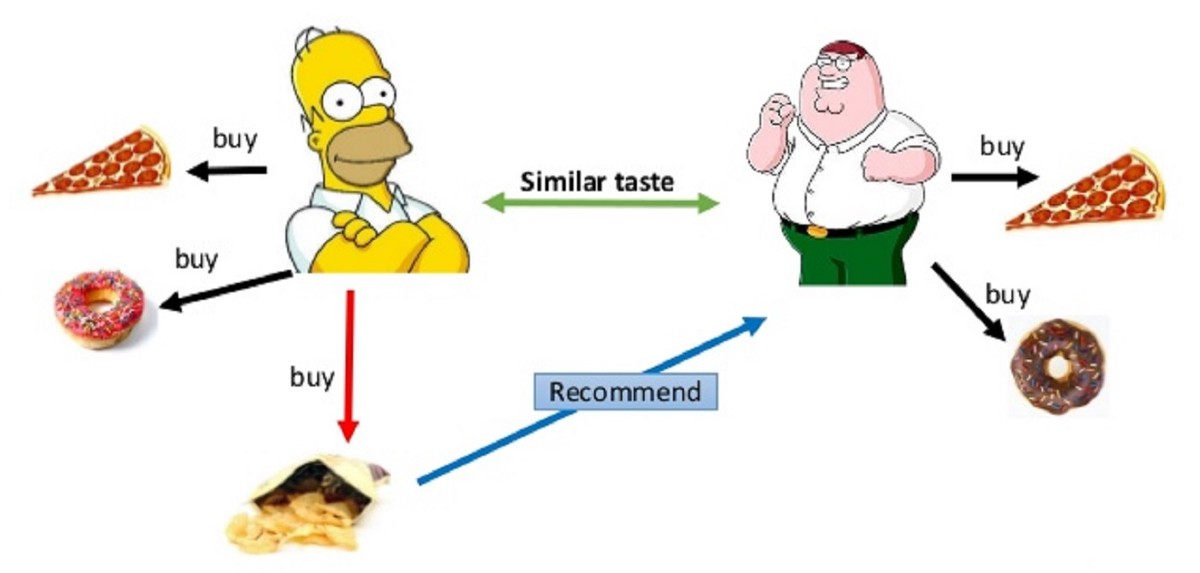

# Доп материалы

https://www.evidentlyai.com/ranking-metrics/ndcg-metric

https://www.evidentlyai.com/ranking-metrics/mean-average-precision-map

https://medium.com/wisio/a-gentle-introduction-to-doc2vec-db3e8c0cce5e